In [104]:
# Make Jupyter wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Uncomment these 2 lines in order to display any variables (dfs) that are on their own line, but in the same input cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'retina'

<center>
![XKCD of Flying!](https://imgs.xkcd.com/comics/python.png)
</center>

# Side Projects </br>
</br>
## Devin Rourke </br>
</br>
### Tuesday Nerd Talk @ Powder Keg Brewing Company </br>
</br>
#### February 21st, 2017


# famous ones (there's a lot)  

Post-it notes   
Breweries

Gmail  
20% rule at Google  (.. 120% rule?)

<center>    
<img src="sideprojects.png" width="1000">
</center>

<center>
![time](time.png)
</center>

<center>
<img src="xkcd.png" width="800">
</center>

# My side project:  
</br>
</br>
## Python  
</br>
</br>
## Data  
</br>
</br>
## Running  

# Part 1: Get Data
</br>
</br>
## Webscraping

<center>
<img src="table.png" width="1200">
</center>

<center>
<img src="url.png" width="1000">
</center>

**50** athletes / page  
**20** pages  
**17** years (2000 – 2016)  
**7** events (_XC_: 5000m; _Track_: 100m, 200m, 400m, 800m, 1600m, 3200m)  
**2** genders  
**51** states  
* * *
## = 12,138,000 records

In [4]:
from selenium import webdriver
import html5lib, lxml
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib                                                                                                                                                                  
import datetime
import time
import os
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#### Construct URL(s) and log in

In [ ]:
# Construct URL(s) and log In

state = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL",
         "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
         "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH",
         "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI",
         "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
gender = ['Boys', 'Girls']
year = ['2000','2001','2002','2003','2004','2005','2006','2007',
        '2008','2009','2010','2011','2012','2013','2014','2015','2016']
page = ['1','2','3','4','5','6','7','8','9','10',
        '11','12','13','14','15','16','17','18','19','20']

login_url = 'https://accounts.milesplit.com/login?'
url = "http://" + state[0] + ".milesplit.com/rankings/events/" + "high-school-"
        + gender[0] + "/cross-country/5000m?year=" + year[0] + "&page=" + page[0]

init_url = login_url + 'next=' + url
driver = webdriver.Chrome()                   # need to use Selenium webdriver because 
driver.get(init_url)                          # login page is dynamically generated

## Log in
username = driver.find_element_by_name("username")
password = drive r.find_element_by_name("password")
username.send_keys("XXXXXX")
password.send_keys("XXXXXX")
time.sleep(3)                                  # explicit wait, until javascript finishes
driver.find_element_by_xpath("//a[contains(@class, 'btn-continue')]").click()
time.sleep(3)

#### Harvest and parse the data, while looping through each URL

In [ ]:
# Harvest and parse the data, while looping through each URL

## Initialize list of dataframes
dfs = []

## Parse HTML table on passed page into a Pandas dataframe, return dataframe
def page_df(yr, st, ge):
        df_page = pd.read_html(content)[0]  # index chooses the first (only) dataframe of a list of dataframes
        df_page['Year'] = yr            # append Year column
        df_page['State'] = st           # append State column
        df_page['Gender'] = ge          # append Gender column
        return (df_page)
    
## Loop over all desired URLs
for ge in gender:
    for st in state:
        for yr in year:
            for pg in page:
                url = "http://" + st + ".milesplit.com/rankings/events/" + "high-school-" + ge + "/cross-country/5000m?year=" + yr + "&page=" + pg
                driver.get(url)
                time.sleep(1)                     # increase this to pretend I'm not a robot
                content = driver.page_source      # this returns the raw HTML
                if "<table" not in content: 
                    df_page = []
                    table_flag = 0
#                     print "No results this year."
                    break
                else: 
                    table_flag = 1
                    if "pagination" not in content:
#                         print "Last page of results for this year"
                        dfs.append(page_df(yr, st, ge))
                        break
                    else:
                        teststring = "Page " + str(pg) + " of "                                        # these 3 lines are determining whether there are 20 pages of data,
                        page_of = content.find(teststring)                                             #  because if there isn't, passing a page number one greater than the
                        num_pages = int(content[page_of+len(teststring):page_of+len(teststring)+2])    #   number of pages returns ALL the records. Its a HUGE shortcut!
#                         print num_pages
                        if num_pages < 20:
#                             print "Woohoo! Shortcut.."
                            pg = str(num_pages + 1)    # request page one greater than listed...
                            url = "http://" + st + ".milesplit.com/rankings/events/" + "high-school-" + ge + "/cross-country/5000m?year=" + yr + "&page=" + str(pg)
                            driver.get(url)
                            content = driver.page_source
                            time.sleep(3)                            # let the WHOLE huge table load
                            dfs.append(page_df(yr, st, ge))
                            break
                        else:
                            dfs.append(page_df(yr, st, ge))
#                             print "MOAR DATA!"

#### Clean up the data and export

In [ ]:
# Clean up df for export to .csv
df = pd.concat(dfs, ignore_index=True)            # concatenate all the dfs that were produced in the loop above

df.columns = ['Rank', 'Time','Athlete/School','Grade','Meet','Year','State','Gender']
df['Time'] = df['Time'].fillna(0).astype(str)                                               # necessary for the next step..
df['Time'] = df['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + float(x[1][0:4]))   # convert xx:xx to number of seconds
df['Grade'] = df['Grade'].fillna(0).astype(int)                                             # 
df['Year'] = df['Year'].fillna(0).astype(int)
df
# df.to_csv('5K.csv', encoding='utf-8')

# Read in .csv files

In [5]:
# Read in .csv files

dfL = pd.read_csv('5K.csv')
dfR = pd.read_csv('elevation.csv', names = ['State', 'Elevation'])

df = pd.merge(dfL, dfR, on='State')

df_size = os.path.getsize('5K.csv')
print df_size

109792334


#### Learn about the data

In [38]:
df.head(10)

Rank    Time                Athlete/School  Grade  \
0     1   959.9  Tyler Stanfield  Homewood HS   2002   
1     2  1077.4  Scott Fuqua  Oak Mountain HS   2002   
2     1  1032.3        Robert Bedsole  Hoover   2005   
3     2  1103.2    Joshua Pawlik  Homewood HS   2005   
4     3  1109.7       Jeremy Moujoodi  Hoover   2006   
5     4  1121.9          Scott Novack  Hoover   2005   
6     5  1136.8        Jason McMillan  Pelham   2005   
7     6  1204.3           John Nevels  Austin   2004   
8     7  1209.4           Davis Hurst  Pelham   2010   
9     1   975.9        Robert Bedsole  Hoover   2005   

                                                Meet  Year State Gender  \
0       Foot Locker Nationals 2001  26th Dec 8, 2001  2001    AL   Boys   
1       Foot Locker Nationals 2001  32nd Dec 8, 2001  2001    AL   Boys   
2  USATF National Junior Olympic XC Championships...  2002    AL   Boys   
3  USATF National Junior Olympic XC Championships...  2002    AL   Boys   
4  USATF National Junior Olympic XC Championships...  2002    AL   Boys   
5  USATF National Junior Olympic XC Championships...  2002    AL   Boys   
6  USATF National Junior Olympic XC Championships...  2002    AL   Boys   
7  USATF National Junior Olympic XC Championships...  2002    AL   Boys   
8  USATF National Junior Olympic XC Championships...  2002    AL   Boys   
9               Nike Team Nationals  8th Dec 4, 2004  2004    AL   Boys   

  Elevation  
0     500.0  
1     500.0  
2     500.0  
3     500.0  
4     500.0  
5     500.0  
6     500.0  
7     500.0  
8     500.0  
9     500.0

In [8]:
df.tail()

Rank    Time                                    Athlete/School  Grade  \
948586   440  2284.0         Maggie Henderson  Star Valley High School   2020   
948587   441  2314.0  Samantha Portenier  Cheyenne Central High School   2019   
948588   442  2326.3                 Caylin Deniz  Worland High School   2020   
948589   443  2384.9                 Cailyn Deniz  Worland High School      0   
948590   444  2432.0                   Liz Bixler  Rawlins High School   2018   

                                                     Meet  Year State Gender  \
948586  Wyoming 3A West Conference Championships  73rd...  2016    WY  Girls   
948587  Liberty Bell Cross Country Invitational  122nd...  2016    WY  Girls   
948588                  Worland Invite  68th Sep 22, 2016  2016    WY  Girls   
948589             Cody Fox and Hounds  32nd Sep 16, 2016  2016    WY  Girls   
948590  Kelly Walsh Bear Trap Cross Country Race  80th...  2016    WY  Girls   

        Elevation  
948586     6700.0  
948587     6700.0  
948588     6700.0  
948589     6700.0  
948590     6700.0

In [9]:
print len(df.index)

948591


In [10]:
boys = df.groupby('Gender').get_group('Boys')
girls = df.groupby('Gender').get_group('Girls')
print str(len(boys)) + ' boy records since 2000'
print str(len(girls)) + ' girl records since 2000'

526350 boy records since 2000
422241 girl records since 2000


In [11]:
print df.dtypes

Rank                int64
Time              float64
Athlete/School     object
Grade               int64
Meet               object
Year                int64
State              object
Gender             object
Elevation         float64
dtype: object


# Plot stuff!

# But First...

<center>
![beer](beer.png)
</center>
  
  
## What's your side project?
#### and when are you giving a TNT about it? (tell Adam)

# Plot stuff!

In [12]:
athlete_school = df['Athlete/School'].str.split(expand = True)
athlete_school.columns = ['First_Name' , 'B' , 'C' , 'D' , 'E' , 'F' , 'G' , 'H', 'I', 'J' , 'K']

In [13]:
athlete_school.First_Name.describe()

count     948591
unique     34217
top         Alex
freq        9531
Name: First_Name, dtype: object

In [103]:
plt.figure(figsize=(9,6))
seaborn.reset_orig()
athlete_school.First_Name.value_counts().head(25).plot.barh(title = 'Frequency of First Names', fontsize = 11)
ax = plt.gca()
ax.invert_yaxis()
plt.show()

NameError: name 'seaborn' is not defined

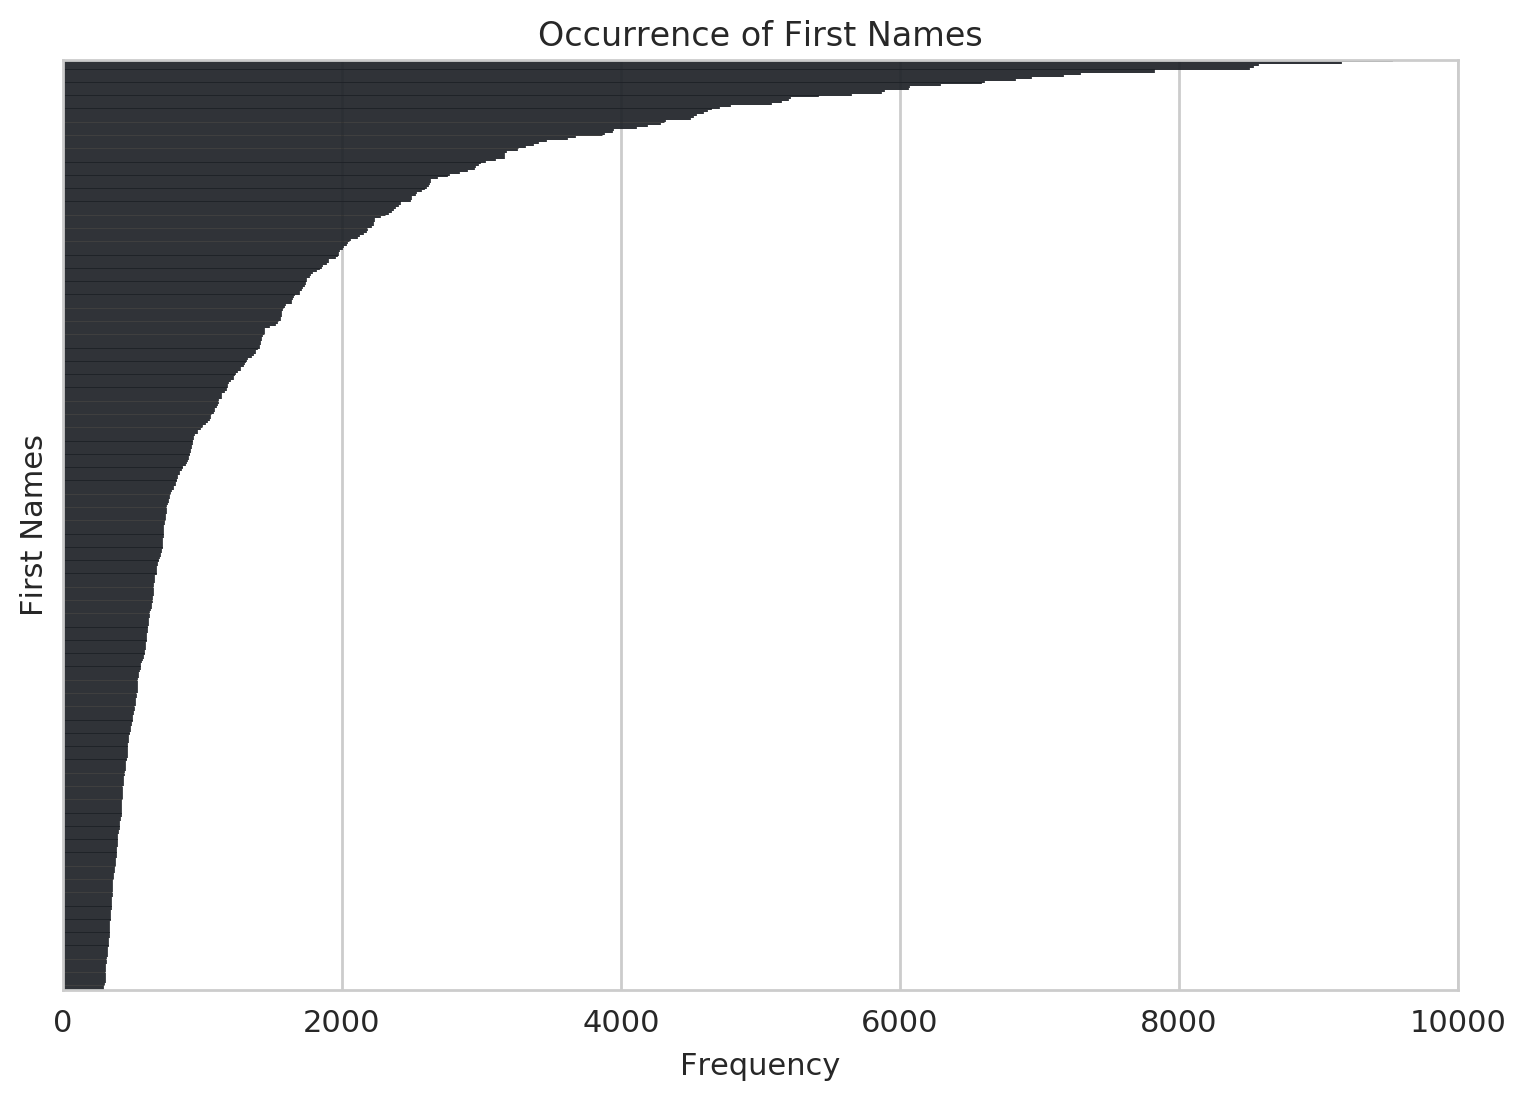

In [91]:
plt.figure(figsize=(9,6))
athlete_school.First_Name.value_counts().head(500).plot.barh(title = 'Frequency of First Names', fontsize = 11)
ax = plt.gca()
ax.invert_yaxis()
plt.yticks([])
plt.xlabel('Frequency')
plt.ylabel('First Names')
plt.title('Occurrence of First Names')
plt.show()

In [16]:
## Fastest boys times run since 2000
boys.sort_values('Time').head(5)

Rank   Time                                Athlete/School  Grade  \
418739     1  850.4                   Dathan Ritzenhein  Rockford   2001   
570173     1  858.7          Edward Cheserek  St. Benedict's Prep   2013   
569173     1  860.0          Edward Cheserek  St. Benedict's Prep   2013   
867606     1  860.8                 Andrew Hunter  Loudoun Valley   2016   
78805      1  864.0  German Fernandez  Riverbank High School (SJ)   2008   

                                                     Meet  Year State Gender  \
418739      MHSAA State Championships LP  1st Nov 4, 2000  2000    MI   Boys   
570173       Essex County Championships  1st Oct 26, 2012  2012    NJ   Boys   
569173       Essex County Championships  1st Oct 28, 2011  2011    NJ   Boys   
867606        Third Battle Invitational  1st Oct 17, 2015  2015    VA   Boys   
78805   CIF State Cross Country Championships  1st Nov...  2007    CA   Boys   

        Elevation  
418739      900.0  
570173      250.0  
569173      250.0  
867606      950.0  
78805      2900.0

In [17]:
## Fastest girls times run since 2000
girls.sort_values('Time').head(5)

Rank   Time                              Athlete/School  Grade  \
89606      1  984.1       Amber Trotter  Ukiah High School (NC)   2002   
656670     1  987.0               Ryen Frazier  Unattached (NC)   2015   
876766     1  989.0           Weini Kelati  Heritage (Leesburg)   2016   
899409     1  991.1  Amy-Eloise Neale  Glacier Peak High School   2013   
96443      1  992.0         Nikki Hiltz  Aptos High School (CC)   2013   

                                                     Meet  Year State Gender  \
89606         Foot Locker Nationals 2001  1st Dec 8, 2001  2001    CA  Girls   
656670       Foot Locker South Regional  1st Nov 29, 2014  2014    NC  Girls   
876766        Third Battle Invitational  1st Oct 17, 2015  2015    VA  Girls   
899409           Sundodger Invitational  1st Sep 15, 2012  2012    WA  Girls   
96443   CIF California Cross Country State Meet  106th...  2009    CA  Girls   

        Elevation  
89606      2900.0  
656670      700.0  
876766      950.0  
899409     1700.0  
96443      2900.0

In [18]:
df.iloc[boys.Time.idxmin()]

Rank                                                          1
Time                                                      850.4
Athlete/School                      Dathan Ritzenhein  Rockford
Grade                                                      2001
Meet              MHSAA State Championships LP  1st Nov 4, 2000
Year                                                       2000
State                                                        MI
Gender                                                     Boys
Elevation                                                   900
Name: 418739, dtype: object

In [19]:
df.iloc[girls.Time.idxmin()]

Rank                                                        1
Time                                                    984.1
Athlete/School          Amber Trotter  Ukiah High School (NC)
Grade                                                    2002
Meet              Foot Locker Nationals 2001  1st Dec 8, 2001
Year                                                     2001
State                                                      CA
Gender                                                  Girls
Elevation                                                2900
Name: 89606, dtype: object

In [20]:
avg_5k = datetime.timedelta(seconds = df.Time.mean())
boys_avg_5k = datetime.timedelta(seconds = boys.Time.mean())
girls_avg_5k = datetime.timedelta(seconds = girls.Time.mean())

print 'Average 5K:   ' + str(avg_5k)[2:7]
print 'Boys Average 5K:   ' +  str(boys_avg_5k)[2:7]
print 'Girls Average 5K:   ' + str(girls_avg_5k)[2:7]

Average 5K:   20:18
Boys Average 5K:   18:34
Girls Average 5K:   22:29


# Let's plot!

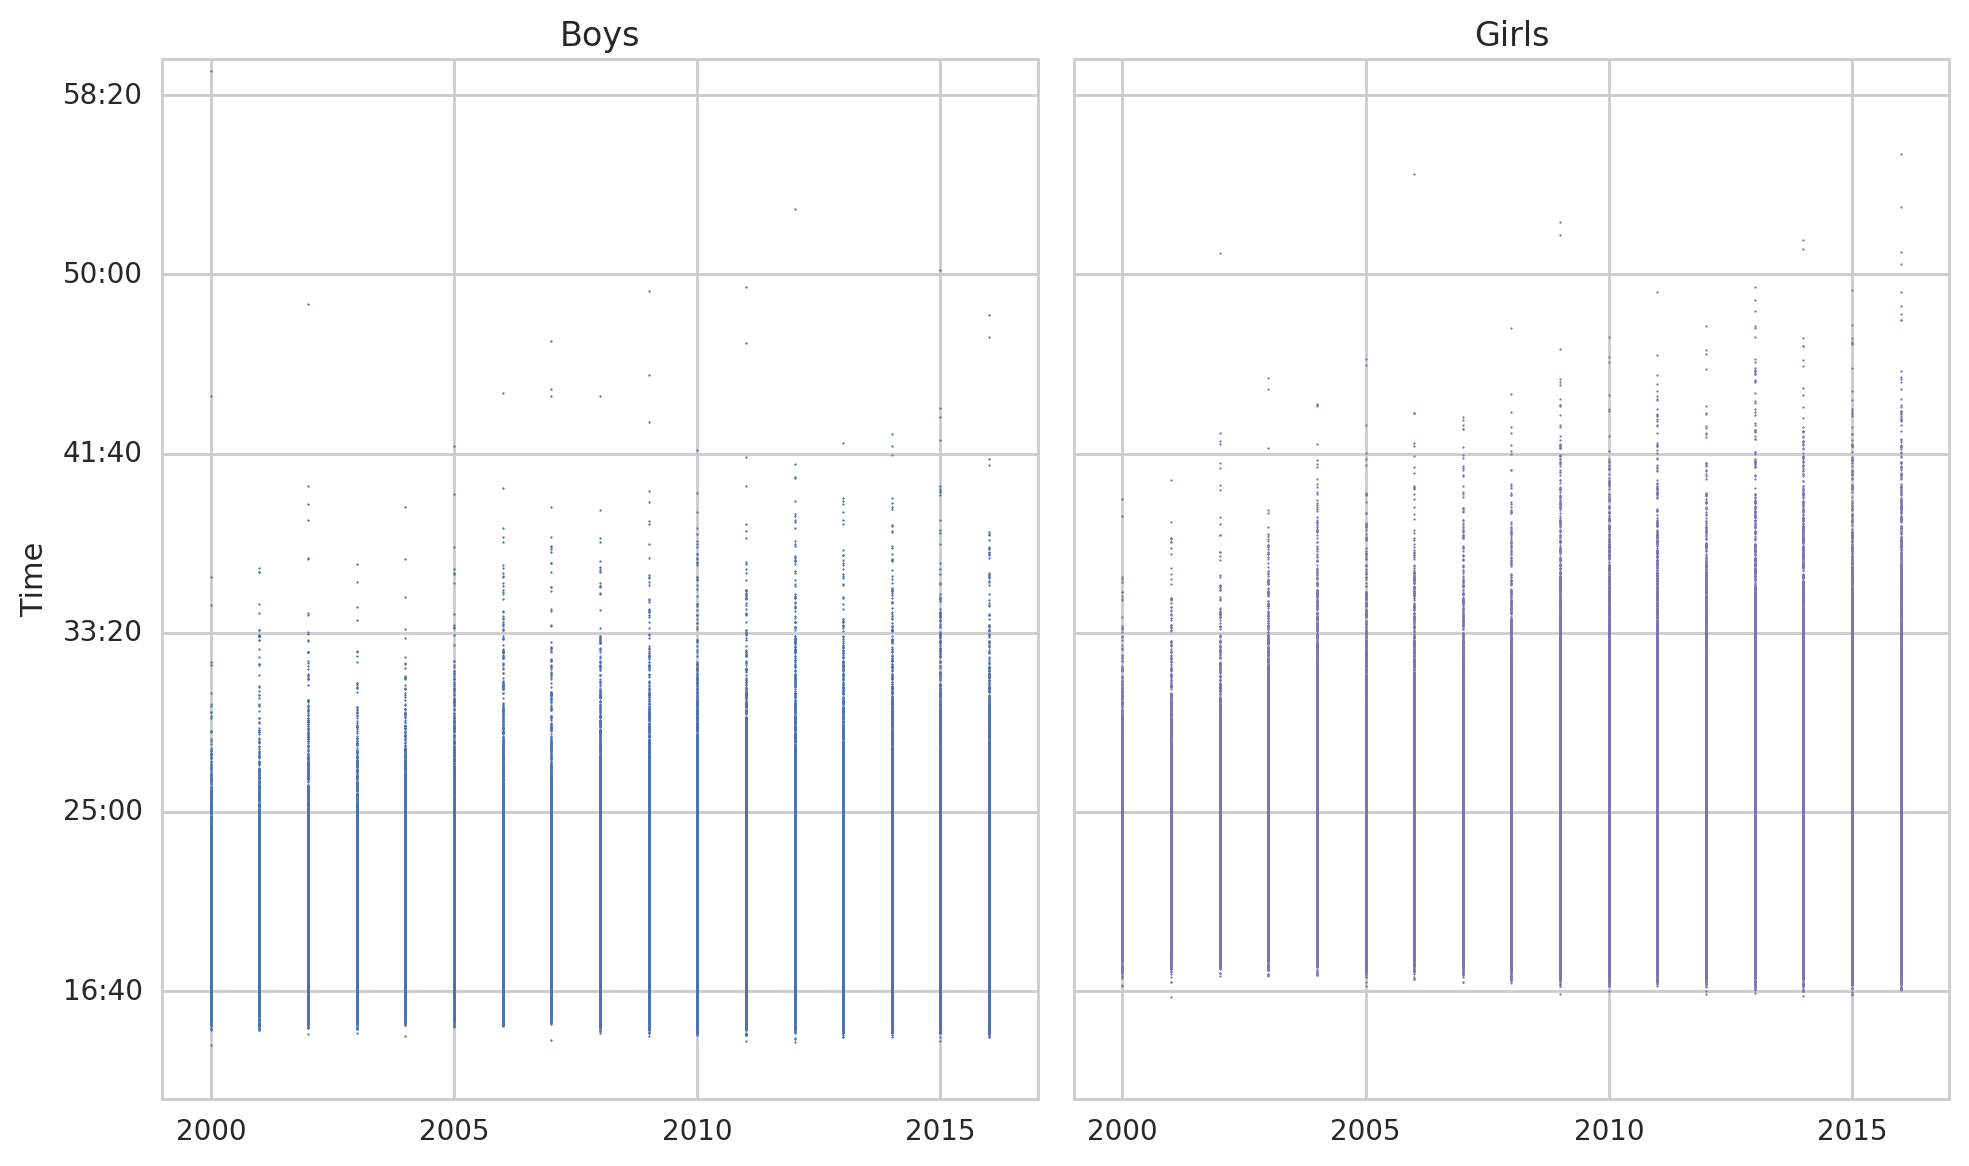

In [92]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(10, 6))
ax1.scatter(boys.Year, boys.Time, s = 1, marker = ".", color = 'b')
ax1.set_title('Boys')
ax1.set_xlim([1999, 2017])
ax1.set_ylim([700, 3600])
ax1.set_ylabel('Time')
ax2.scatter(girls.Year, girls.Time, s = 1, marker = ".", color = 'm')
ax2.set_title('Girls')
ax2.set_xlim([1999, 2017])

def timeTicks(x, pos):
    d = datetime.timedelta(seconds = x)
    return str(d)[2:7]                                                                             
formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax1.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Completeness of the database

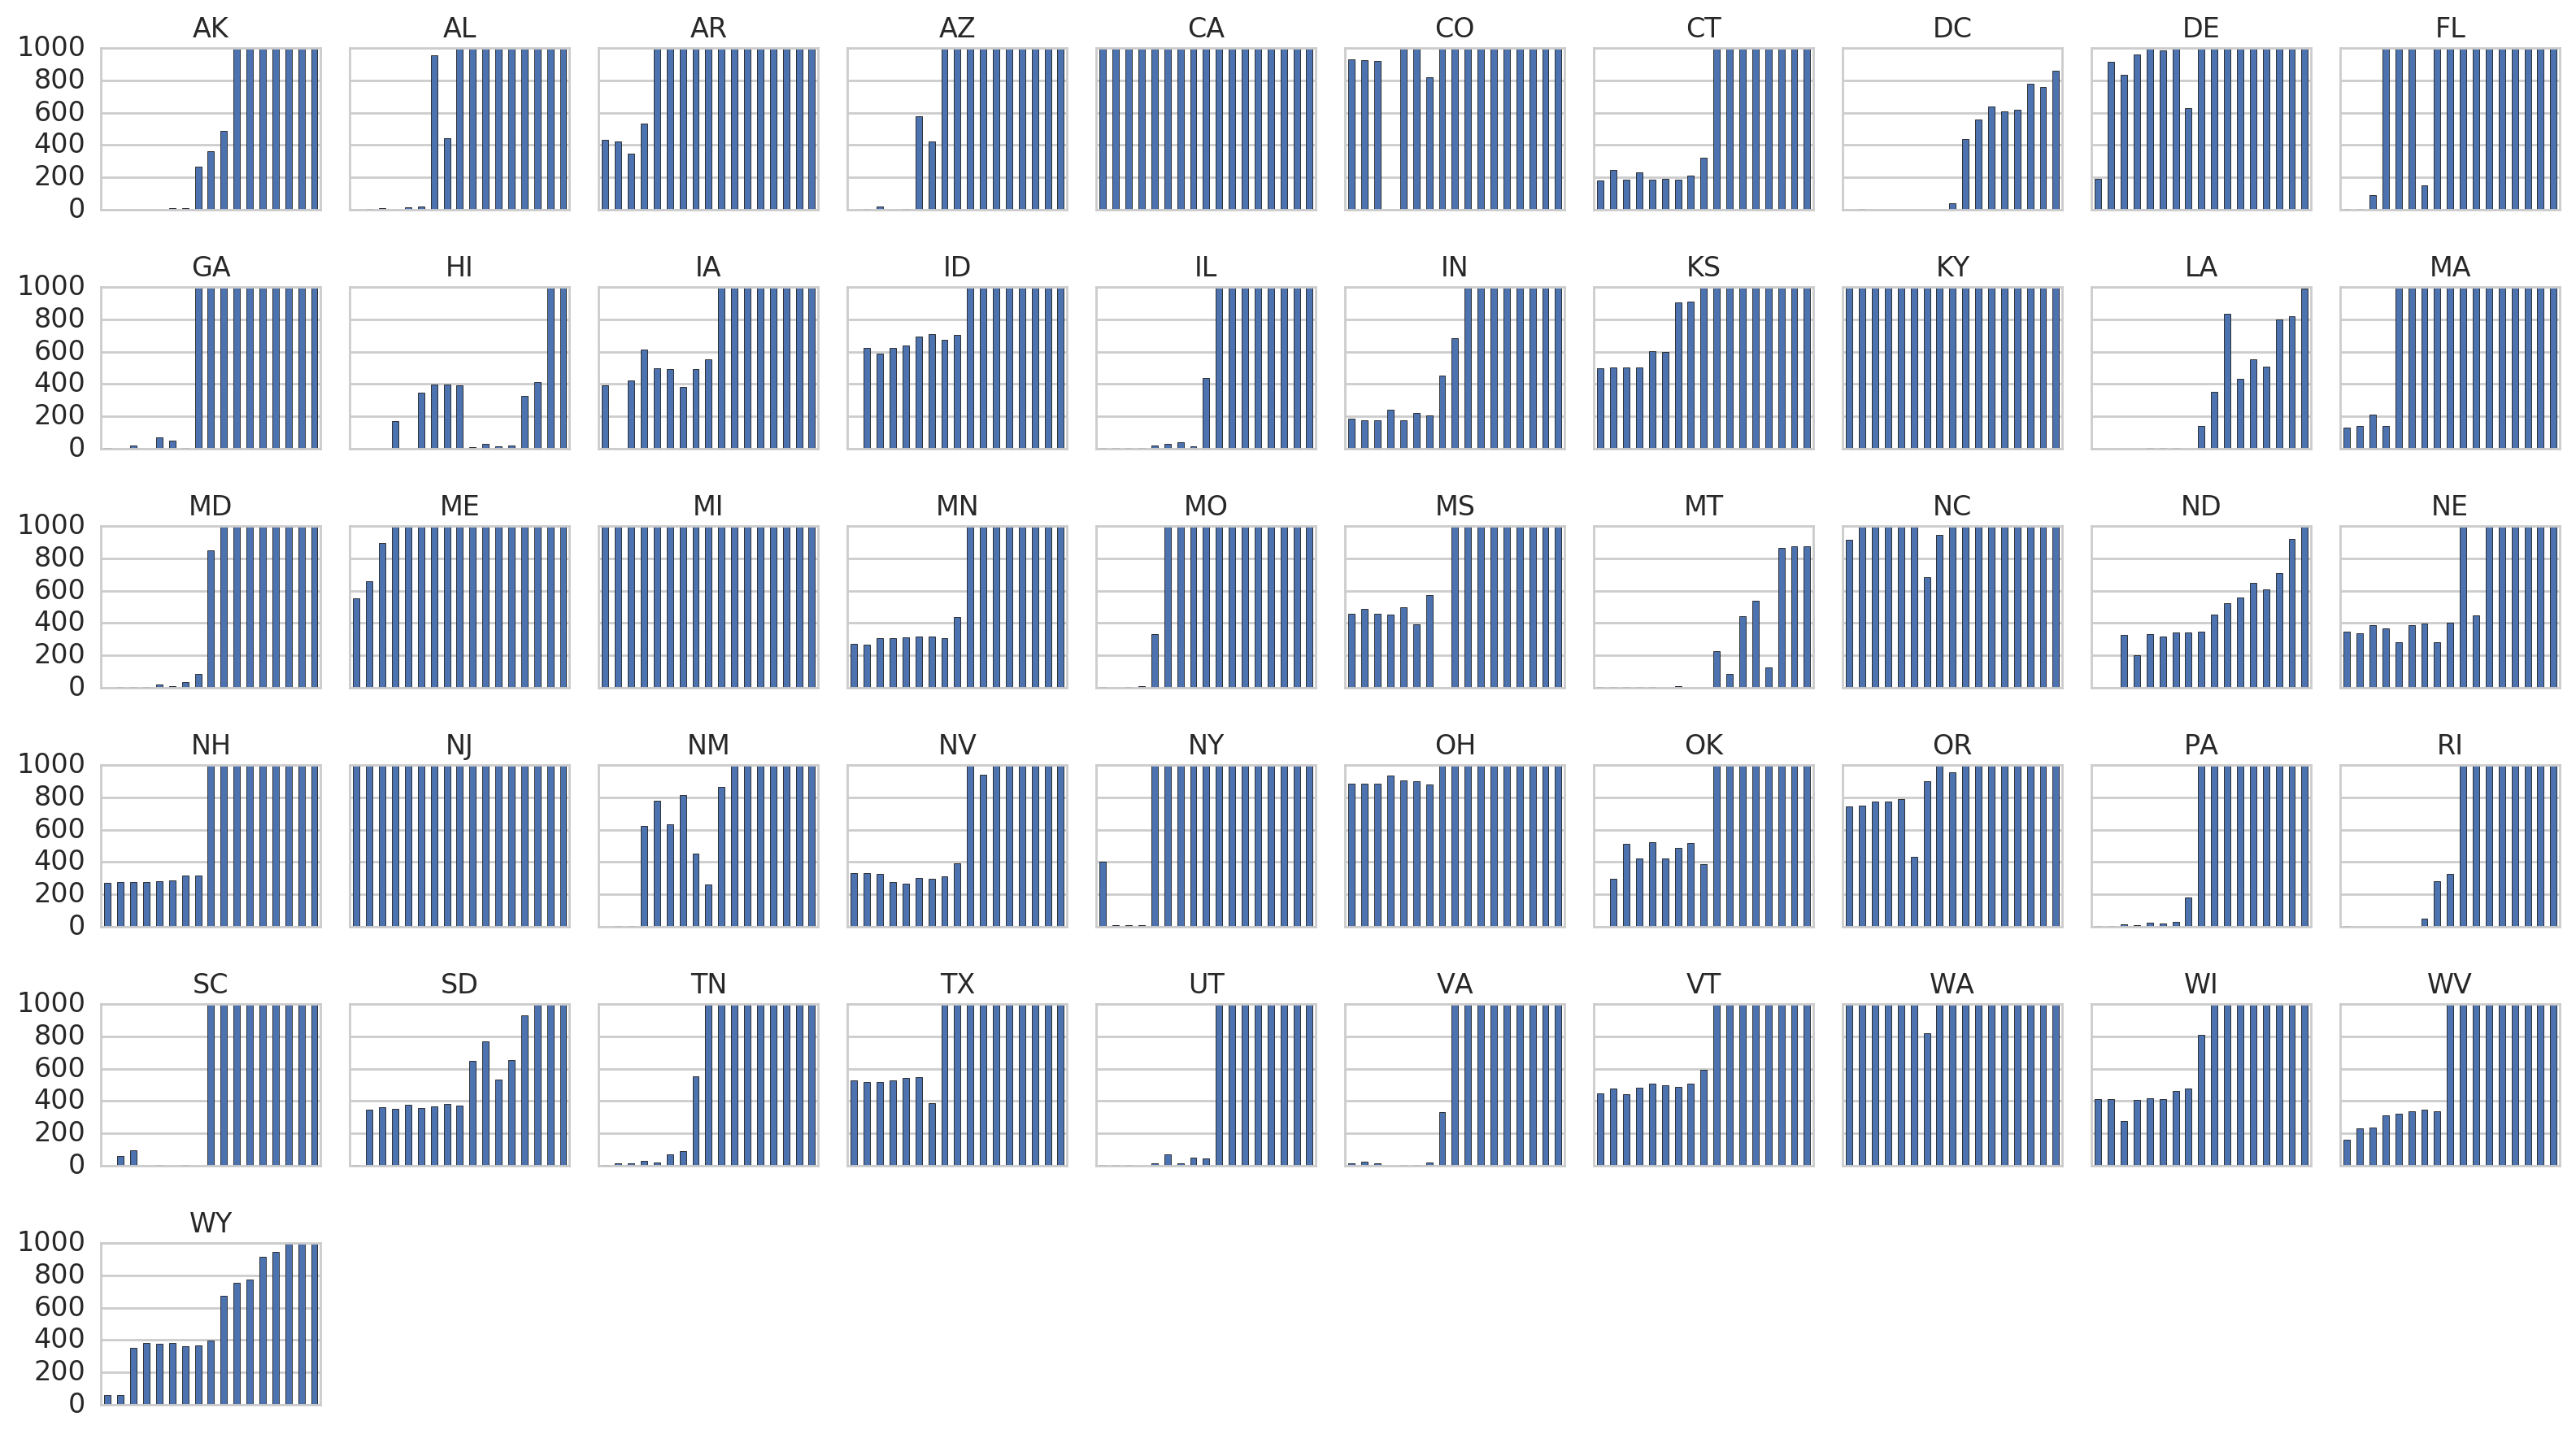

In [93]:
years = ['2000','2001','2002','2003','2004','2005','2006','2007',
         '2008','2009','2010','2011','2012','2013','2014','2015','2016']
years = map(int, years)

ind = 0
for key in sorted(df.Time.groupby(df.State).groups.keys()):    
    ind = ind + 1
    ax = plt.subplot(6, 10, ind)
    plt.axis([2000, 2016, 0, 1000])
    plt.xticks([])
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    df.Time.groupby([df.State, df.Year]).count().get(key).reindex(index=years).plot.bar(
        title = key, figsize = (16, 9), fontsize = 12, sharey = True, sharex = False) 
    plt.tight_layout()
    plt.xlabel('')
plt.show()

# Other fun stats

In [23]:
## State Record holding Boys (only online records, only dating back to 2000)
boys.sort_values('Time').groupby('State').head(1).sort_index()

Rank   Time                                     Athlete/School  Grade  \
5752       1  903.3                       Mac Macoy  Vestavia Hills HS   2014   
22427      1  883.9                    Levi Thomet  Kodiak High School   2015   
36452      1  867.2                 Bernie Montoya  Cibola High School   2013   
60602      1  903.0            Jacob Shiohira  Bentonville High School   2015   
78805      1  864.0       German Fernandez  Riverbank High School (SJ)   2008   
113327     1  886.5        Cerake Geberkidane  Denver East High School   2014   
136645     1  887.0                   Alex Ostberg  Darien High School   2015   
148550     1  916.5          Mike Crozier  Gonzaga College High School   2012   
163089     1  906.8         Kevin Murray  Charter School of Wilmington   2016   
178506     1  891.0                             Matt Mizereck  Leon HS   2010   
203462     1  881.0         Josh Brickell  Peachtree Ridge High School   2013   
221048     1  922.2                Kaeo Kruse  Kamehameha Schools Oahu   2016   
232316     1  901.0            Elijah Armstrong  Pocatello High School   2015   
247153     1  884.2              Lukas Verzbicas  Sandburg High School   2011   
270612     1  875.0                 Curtis Eckstein  Oldenburg Academy   2017   
281009     1  884.0                 Ellen Ries  North-Linn High School   2005   
304929     1  898.3        Stuart Mcnutt  Blue Valley West High School   2015   
323837     1  883.9             Jacob Thomson  Holy Cross (Louisville)   2013   
345960     1  903.8                     Eric Coston  St. Paul's School   2017   
349865     1  902.0                       Ben True  Greely High School   2004   
380593     1  907.9                     Tyler Spear  Loyola-Blakefield   2014   
399220     1  905.2         John Murray  Shrewsbury Senior High School   2011   
418739     1  850.4                        Dathan Ritzenhein  Rockford   2001   
461397     1  894.1                  Seth Eliason  Hopkins High School   2017   
471601     1  919.2                     Max Holman  Tupelo High School   2010   
488396     1  900.6            Caleb Hoover  College Heights Christian   2011   
508744     1  904.4              Marshall Beatty  Sentinel High School   2017   
520628     1  879.5              Seth Hirsch  Millard West High School   2017   
533020     1  899.7                Henry Weisberg  McQueen High School   2017   
549475     1  903.4          Patrick O'brien  Oyster River High School   2017   
570173     1  858.7               Edward Cheserek  St. Benedict's Prep   2013   
594997     1  894.4           Luis Martinez  Sue Cleveland High School   2013   
617832     1  887.0                     Jeriqho Gadway  Plattsburgh HS   2015   
642538     1  884.0                 Ben Huffman  Providence Day School   2014   
663319     1  896.0                Jake Leingang  Bismarck High School   2013   
678380     1  884.7                    Andrew Jordan  Watkins Memorial   2016   
700649     1  891.0              Ben Barrett  Norman North High School   2015   
715918     1  872.7                              Matthew Maton  Summit   2015   
739802     1  887.0                            Noah Affolder  Carlisle   2017   
755672     1  872.4               David Principe Jr.  La Salle Academy   2017   
766366     1  886.8                        Brent Demarest  Porter Gaud   2014   
787577     1  897.1            Derick Peters  West Central High School   2018   
798976     1  872.2               Brodey Hasty  BrentwoodH High School   2018   
814836     1  874.0                                 Craig Lutz  Marcus   2011   
834704     1  872.5                             Conner Mantz  Sky View   2015   
853024     1  924.2  Tyler Marshall  Champlain Valley Union High Sc...   2017   
867606     1  860.8                      Andrew Hunter  Loudoun Valley   2016   
888984     1  871.7         Tanner Anderson  North Central High School   2015   
908753     1  898.0                    

In [24]:
## State Record holding Girls (only online records, only dating back to 2000)
girls.sort_values('Time').groupby('State').head(1).sort_index()

Rank    Time                                     Athlete/School  \
16438      1  1017.0            Amaris Tyynismaa  Catholic - Montgomery   
28896      1  1000.0         Allie Ostrander  Kenai Central High School   
48880      1  1002.9           Danielle Jones  Desert Vista High School   
68268      1  1054.0                 Maggie Montoya  Rogers High School   
89606      1   984.1              Amber Trotter  Ukiah High School (NC)   
128892     1  1004.0                 Brie Oakley  Grandview High School   
143838     1  1035.8                Hannah Debalsi  Staples High School   
151928     1  1042.0                    Devoe Arnold  St. Albans School   
169272     1  1013.0         Julie Macedo  Charter School of Wilmington   
192393     1  1014.1         Kathryn Fluehr  Community School of Naples   
213533     1  1028.0        Grace Tinkey  First Presbyterian Day School   
222559     1  1091.4                  Lauren Ho  Hawaii Baptist Academy   
243795     1  1034.0              Alexa White  Soda Springs High School   
258691     1  1019.5        Anna Sophia Keller  St. Anthony High School   
276199     1  1012.2                 Anna Rohrer  Mishawaka High School   
292521     1  1017.0              Stephanie Jenks  Linn-Mar High School   
312425     1  1005.7                   Cailie Logue  Girard High School   
340310     1  1013.0                  Gabby Karas  Martha Layne Collins   
346633     1  1068.2                     Malia Cali  St. Thomas Aquinas   
370050     1  1055.3              Abbey Leonardi  Kennebunk High School   
392012     1  1034.0          Abigail Green  Walter Johnson High School   
406269     1  1025.1             Natasha Roetter  Lexington High School   
443585     1  1014.8                          Megan Goethals  Rochester   
466305     1  1020.4                Anna Fenske  Farmington High School   
480058     1  1077.0         Abbey Dixon  West Memphis Christian School   
502991     1  1007.2          Taylor Werner  Ste. Genevieve High School   
510625     1  1042.2                    Annie Hill  Glacier High School   
525254     1  1081.6           Taylor Somers  Millard South High School   
534719     1  1039.0                   Marie Lawrence  Reno High School   
557855     1  1032.5             Jacqueline Gaughan  Exeter High School   
587258     1  1017.0                   Briana Gess  Haddonfield Mem. HS   
606300     1  1049.0          Amanda Mayoral  Sue Cleveland High School   
626312     1  1000.9                            Aisling Cuffe  Cornwall   
656670     1   987.0                      Ryen Frazier  Unattached (NC)   
666973     1  1033.2      Karly Ackley  Grand Forks Central High School   
692094     1  1027.5                   India Johnson  Hilliard Davidson   
704925     1  1031.0                  Alex Davis  Plainview High School   
729630     1  1006.6                                Ella Donaghu  Grant   
748942     1  1032.0                   Aislinn Devlin  Downingtown West   
760194     1  1049.2          Ellie Lawler  South Kingstown High School   
776444     1  1038.0                Logan Morris  Spartanburg Christian   
788579     1  1045.0                  Ramsey Kavan  Yankton High School   
807318     1  1017.4      Rebecca Story  Christian Academy of Knoxville   
827842     1  1000.5                       Devin Clark  Smithson Valley   
842207     1  1020.6                                 Sarah Feeny  Ogden   
858100     1  1068.3  Autumn Eastman  Champlain Valley Union High Sc...   
876766     1   989.0                  Weini Kelati  Heritage (Leesburg)   
899409     1   991.1         Amy-Eloise Neale  Glacier Peak High School   
917677     1  1024.0                   Amelia Paladino  University High   
933419     1  1028.0               Molly Seidel  University Lake School   
948147     1  1051.0              Anna Gibson  Jackson Hole High School   

        Grade                                               Meet  Year State  \
16438    2019       Foot Lo

In [25]:
## quick glance at any given state
boys.groupby('State').get_group('CO').describe().drop('Grade', 1).round()
# girls.groupby('State').get_group('CO').describe().drop('Grade', 1).round()

Rank     Time     Year  Elevation
count  12868.0  12868.0  12868.0    12868.0
mean     438.0   1079.0   2010.0     6800.0
std      280.0     74.0      4.0        0.0
min        1.0    886.0   2000.0     6800.0
25%      201.0   1036.0   2007.0     6800.0
50%      401.0   1074.0   2010.0     6800.0
75%      667.0   1107.0   2013.0     6800.0
max     1000.0   1957.0   2016.0     6800.0

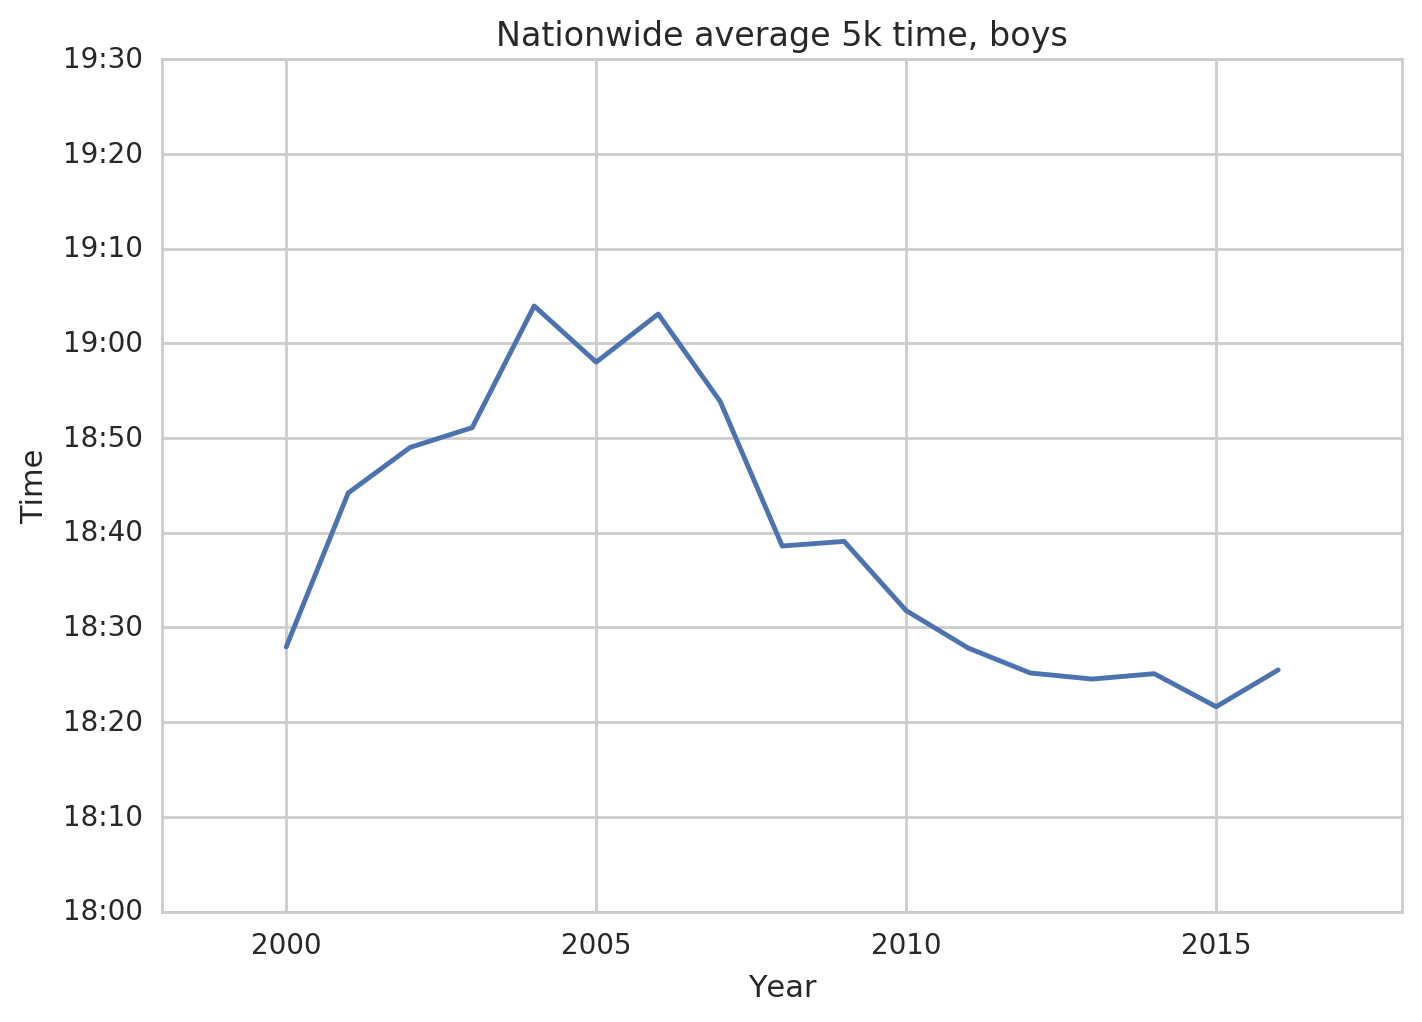

In [94]:
boys.Time.groupby(df.Year).mean().plot(color = 'b')
plt.axis([1998, 2018, 18*60, 19.5*60])
plt.ylabel('Time')
plt.title('Nationwide average 5k time, boys')

def timeTicks(x, pos):
    d = datetime.timedelta(seconds = x)
    return str(d)[2:7]

formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()

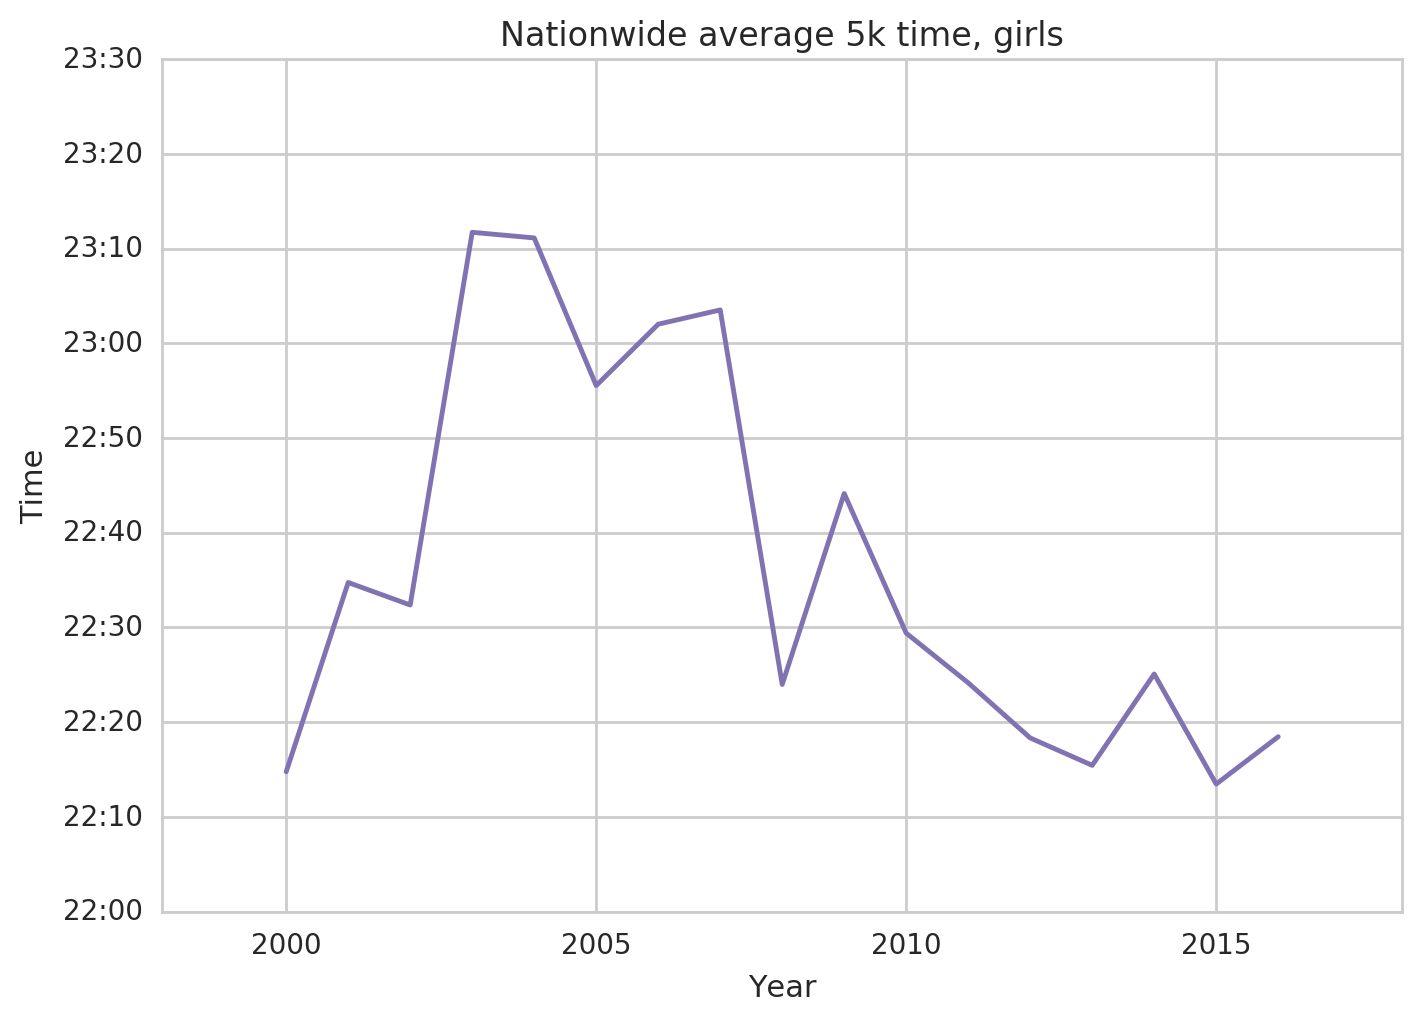

In [95]:
girls.Time.groupby(df.Year).mean().plot(color = 'm')
plt.axis([1998, 2018, 22*60, 23.5*60])
plt.ylabel('Time')
plt.title('Nationwide average 5k time, girls')

def timeTicks(x, pos):
    d = datetime.timedelta(seconds = x)
    return str(d)[2:7]

formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()

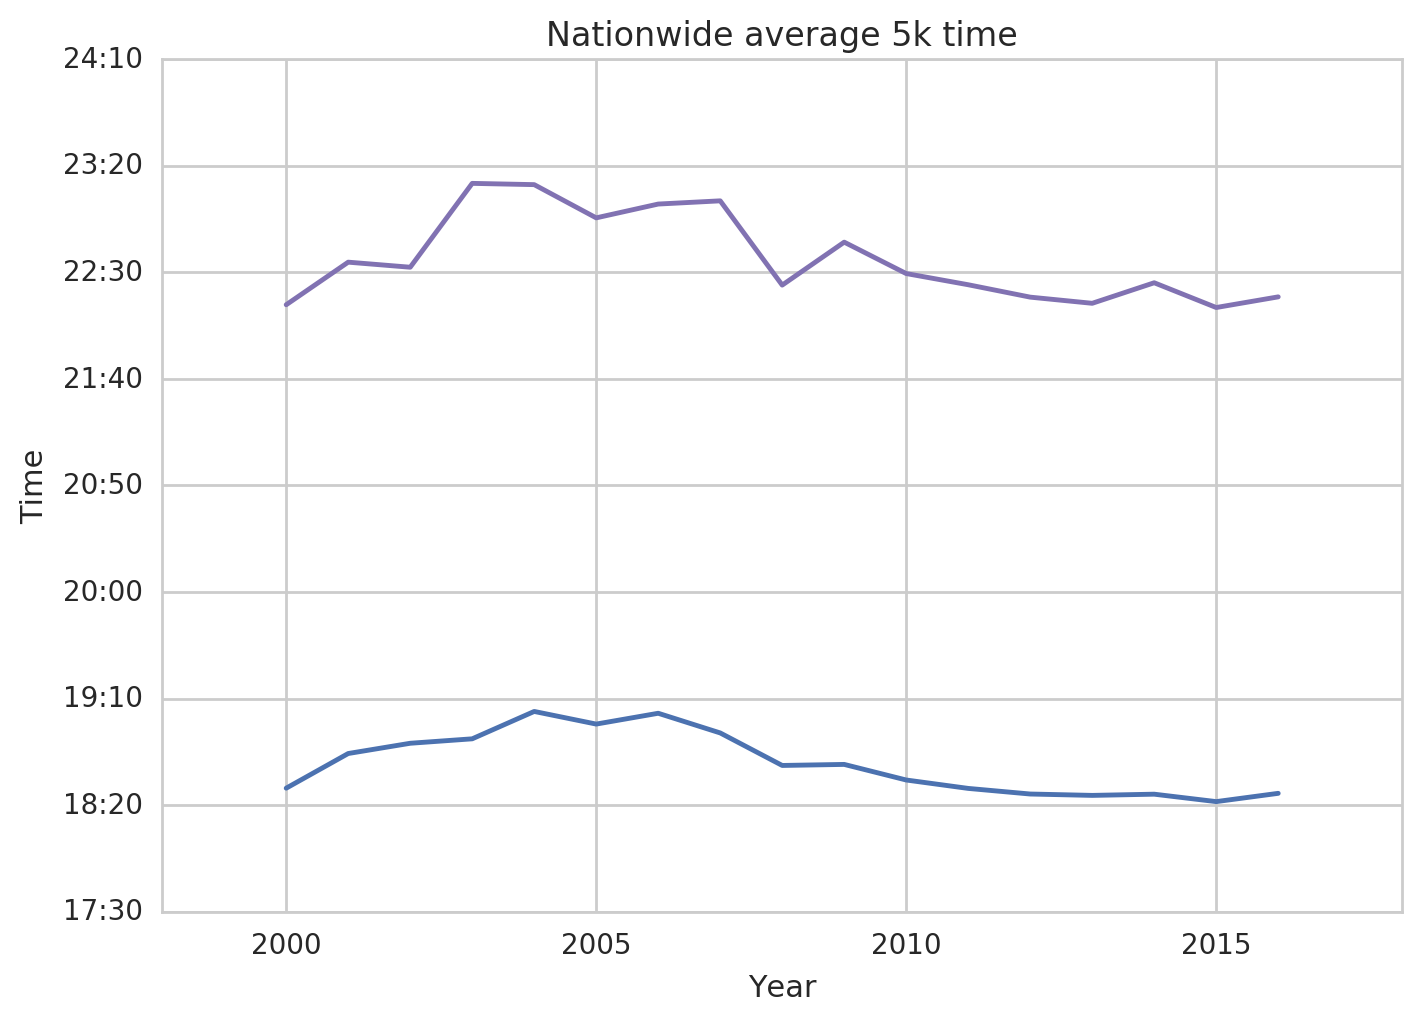

In [96]:
boys.Time.groupby(df.Year).mean().plot(color = 'b')
girls.Time.groupby(df.Year).mean().plot(color = 'm')
plt.axis([1998, 2018, 1050, 1450])
plt.ylabel('Time')
plt.title('Nationwide average 5k time')

def timeTicks(x, pos):
    d = datetime.timedelta(seconds = x)
    return str(d)[2:7]

formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()

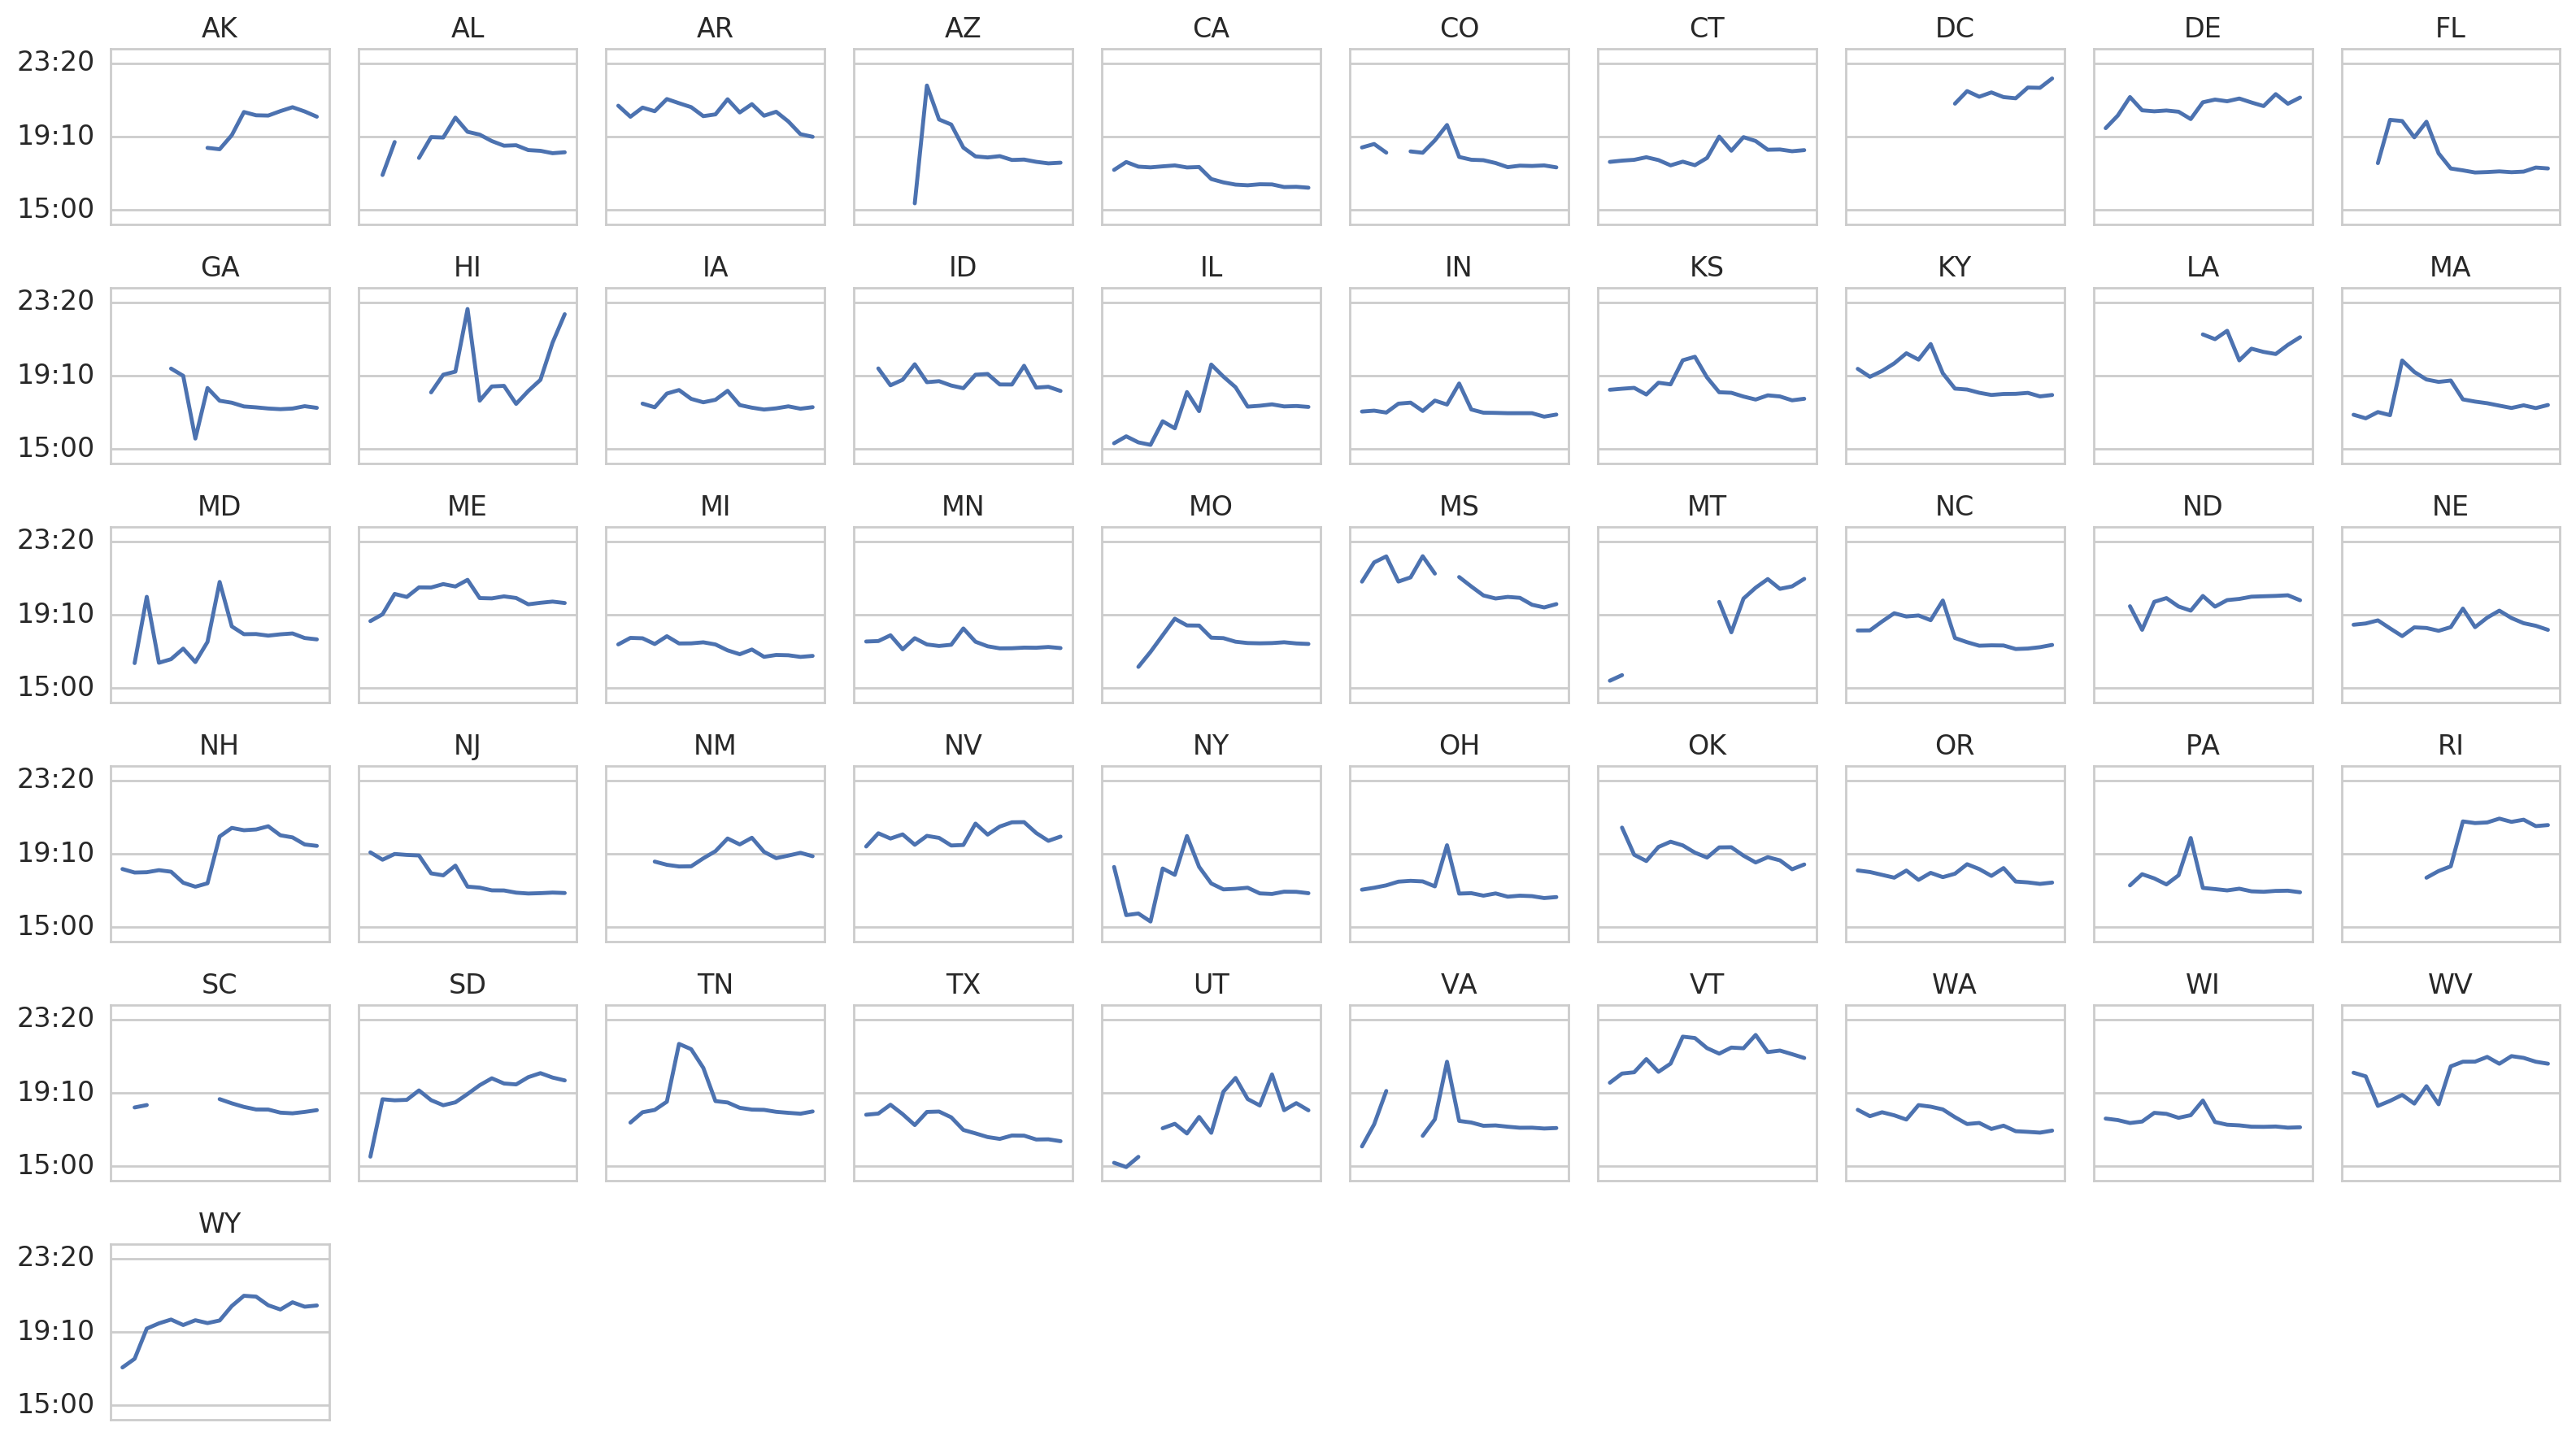

In [97]:
df2 = boys.Time.groupby([df.State, df.Year]).mean()

years = ['2000','2001','2002','2003','2004','2005','2006','2007',
         '2008','2009','2010','2011','2012','2013','2014','2015','2016']
years = map(int, years)

ind = 0
for key in sorted(df.Time.groupby(df.State).groups.keys()):
    ind = ind + 1
    plt.subplot(6, 10, ind)
    plt.xticks([])
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    df2[key].fillna(0).reindex(index=years).plot(title = key, figsize = (16, 9), yticks = [900, 1150, 1400],
                            color = 'b', fontsize = 12, sharey = True, sharex = False)
    plt.axis([1999, 2017, 850, 1450])

    formatter = matplotlib.ticker.FuncFormatter(timeTicks)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(formatter)
    
    plt.tight_layout()
    plt.xlabel('')
plt.show()

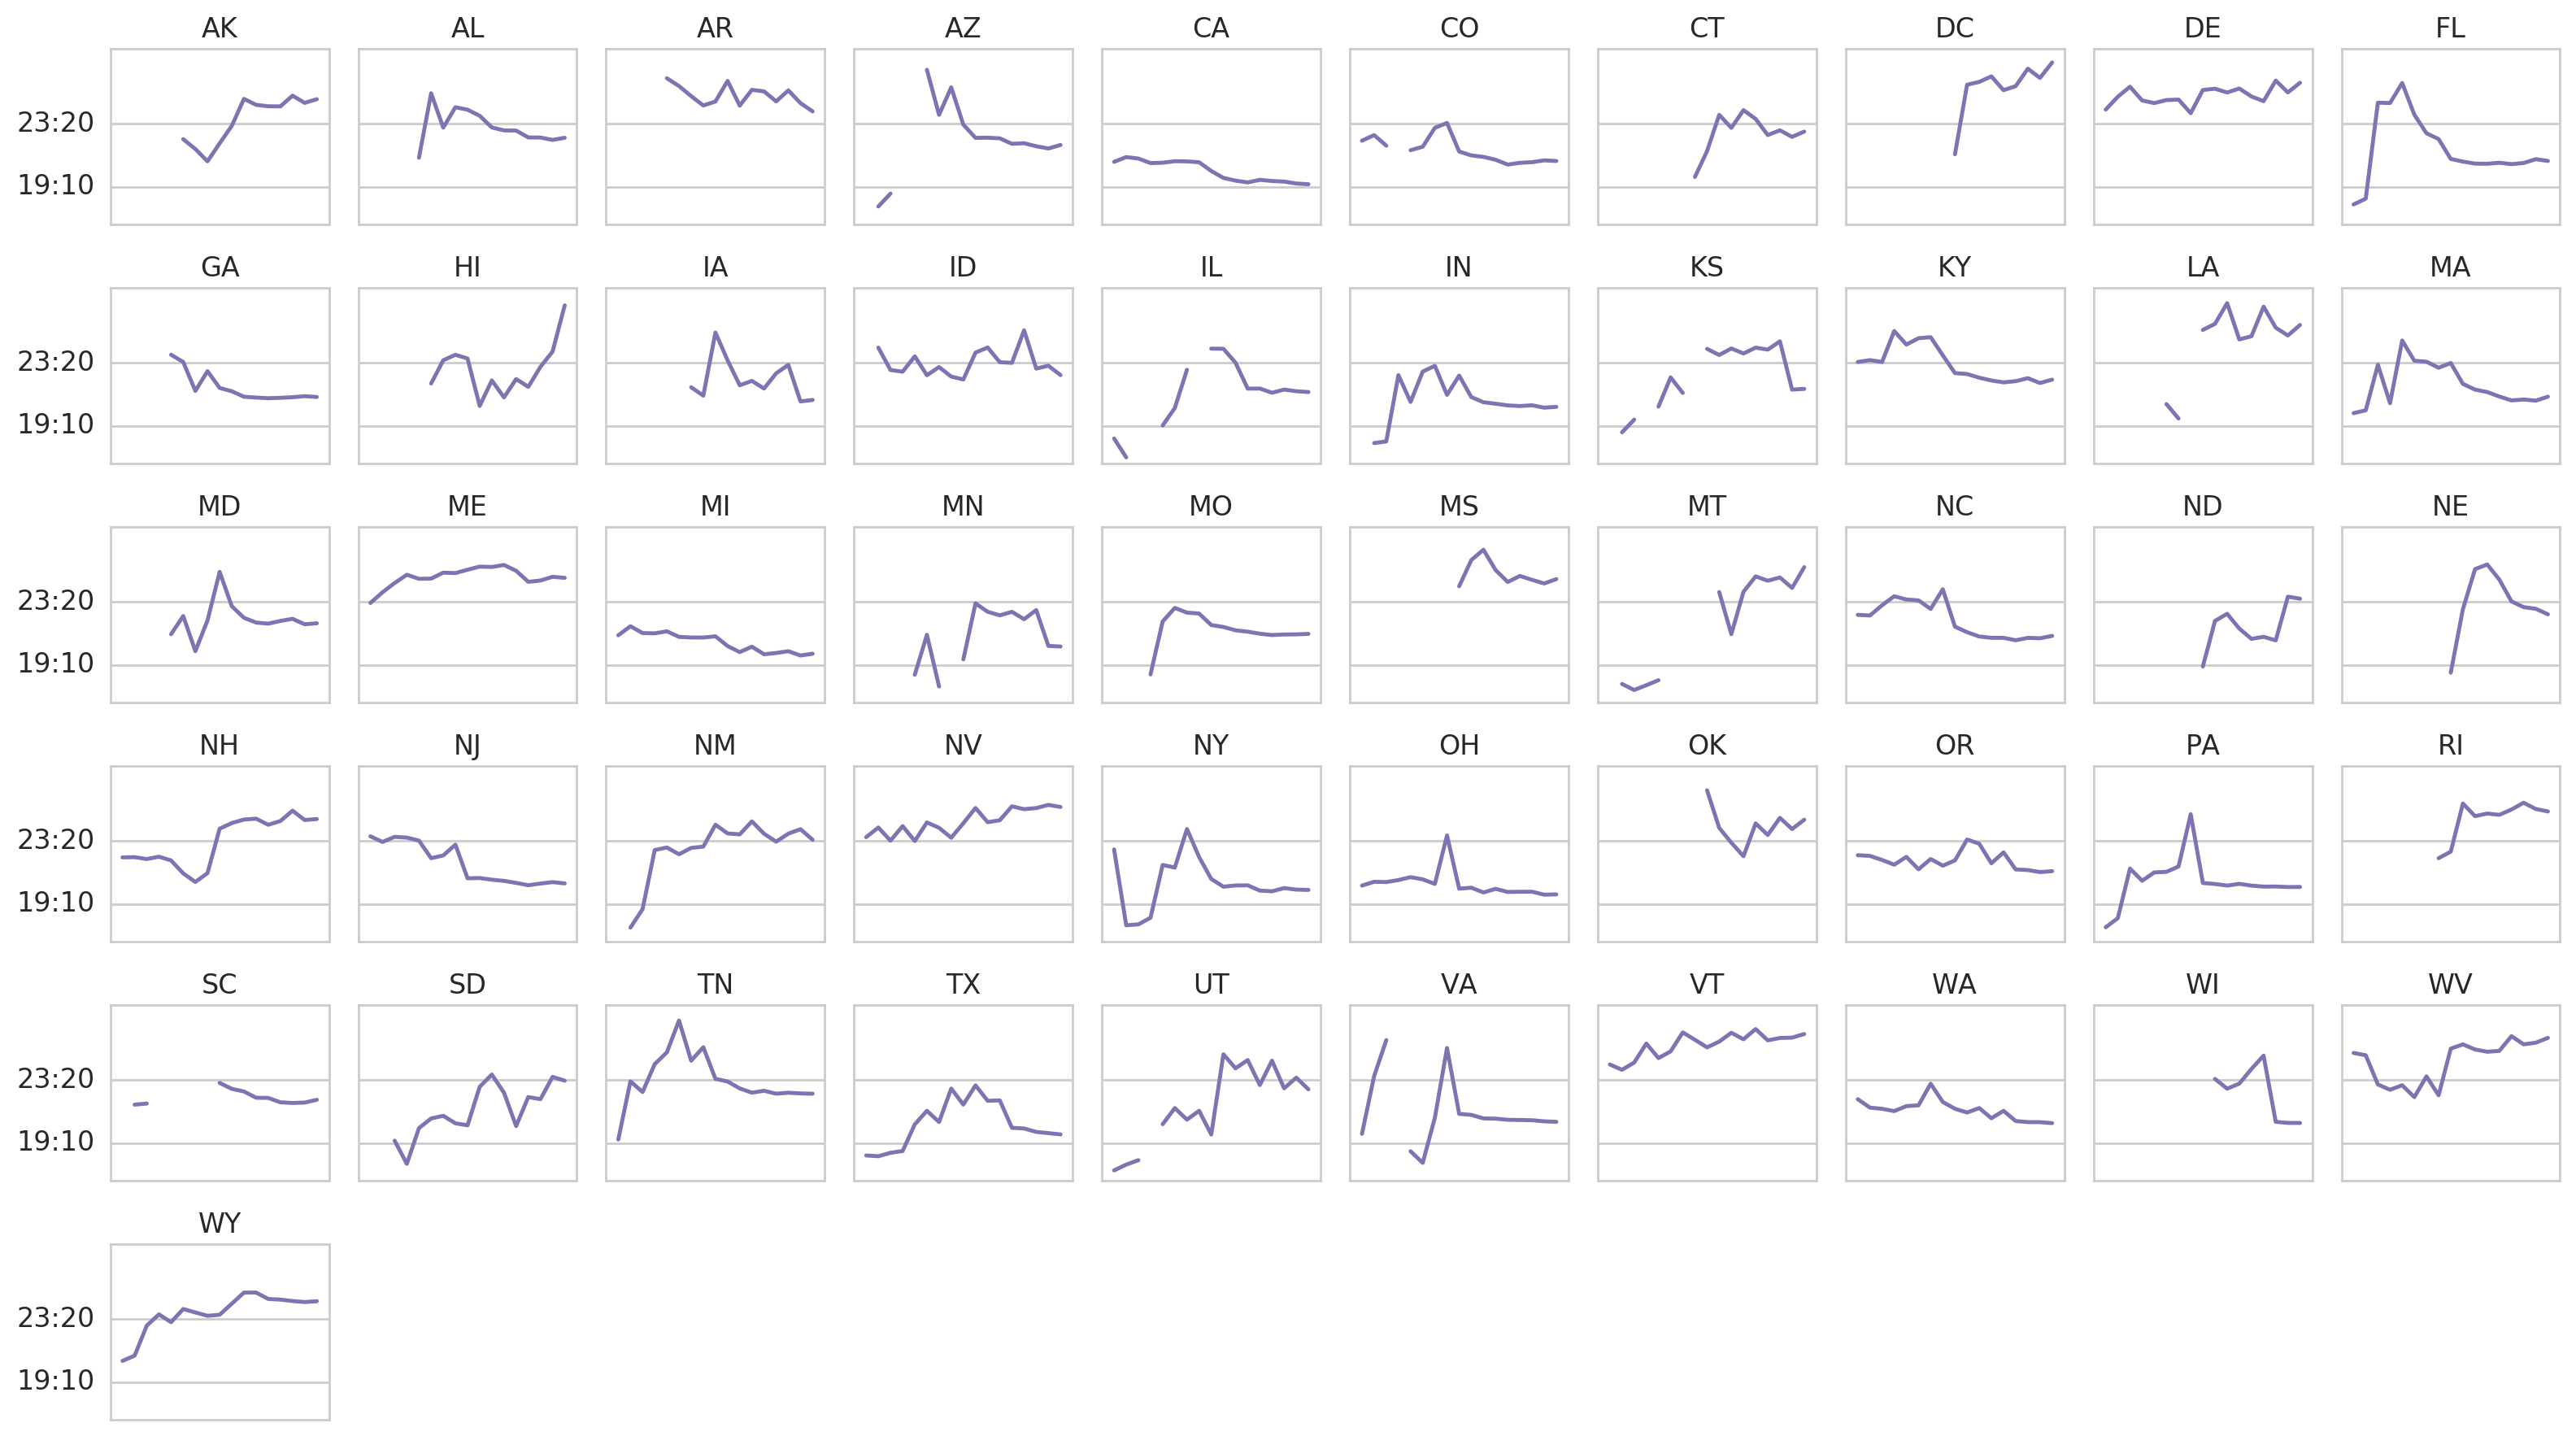

In [98]:
df3 = girls.Time.groupby([df.State, df.Year]).mean()

years = ['2000','2001','2002','2003','2004','2005','2006','2007',
         '2008','2009','2010','2011','2012','2013','2014','2015','2016']
years = map(int, years)

ind = 0
for key in sorted(df.Time.groupby(df.State).groups.keys()):    
    ind = ind + 1 
    plt.subplot(6, 10, ind)
    plt.xticks([])
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    
    df3[key].fillna(0).reindex(index=years).plot(title = key, figsize = (16, 9), yticks = [900, 1150, 1400],
                            color = 'm', fontsize = 12, sharey = True, sharex = False)
    
    
    plt.axis([1999, 2017, 1000, 1700])
    
    formatter = matplotlib.ticker.FuncFormatter(timeTicks)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(formatter)
    
    plt.tight_layout()
    plt.xlabel('')
plt.show()

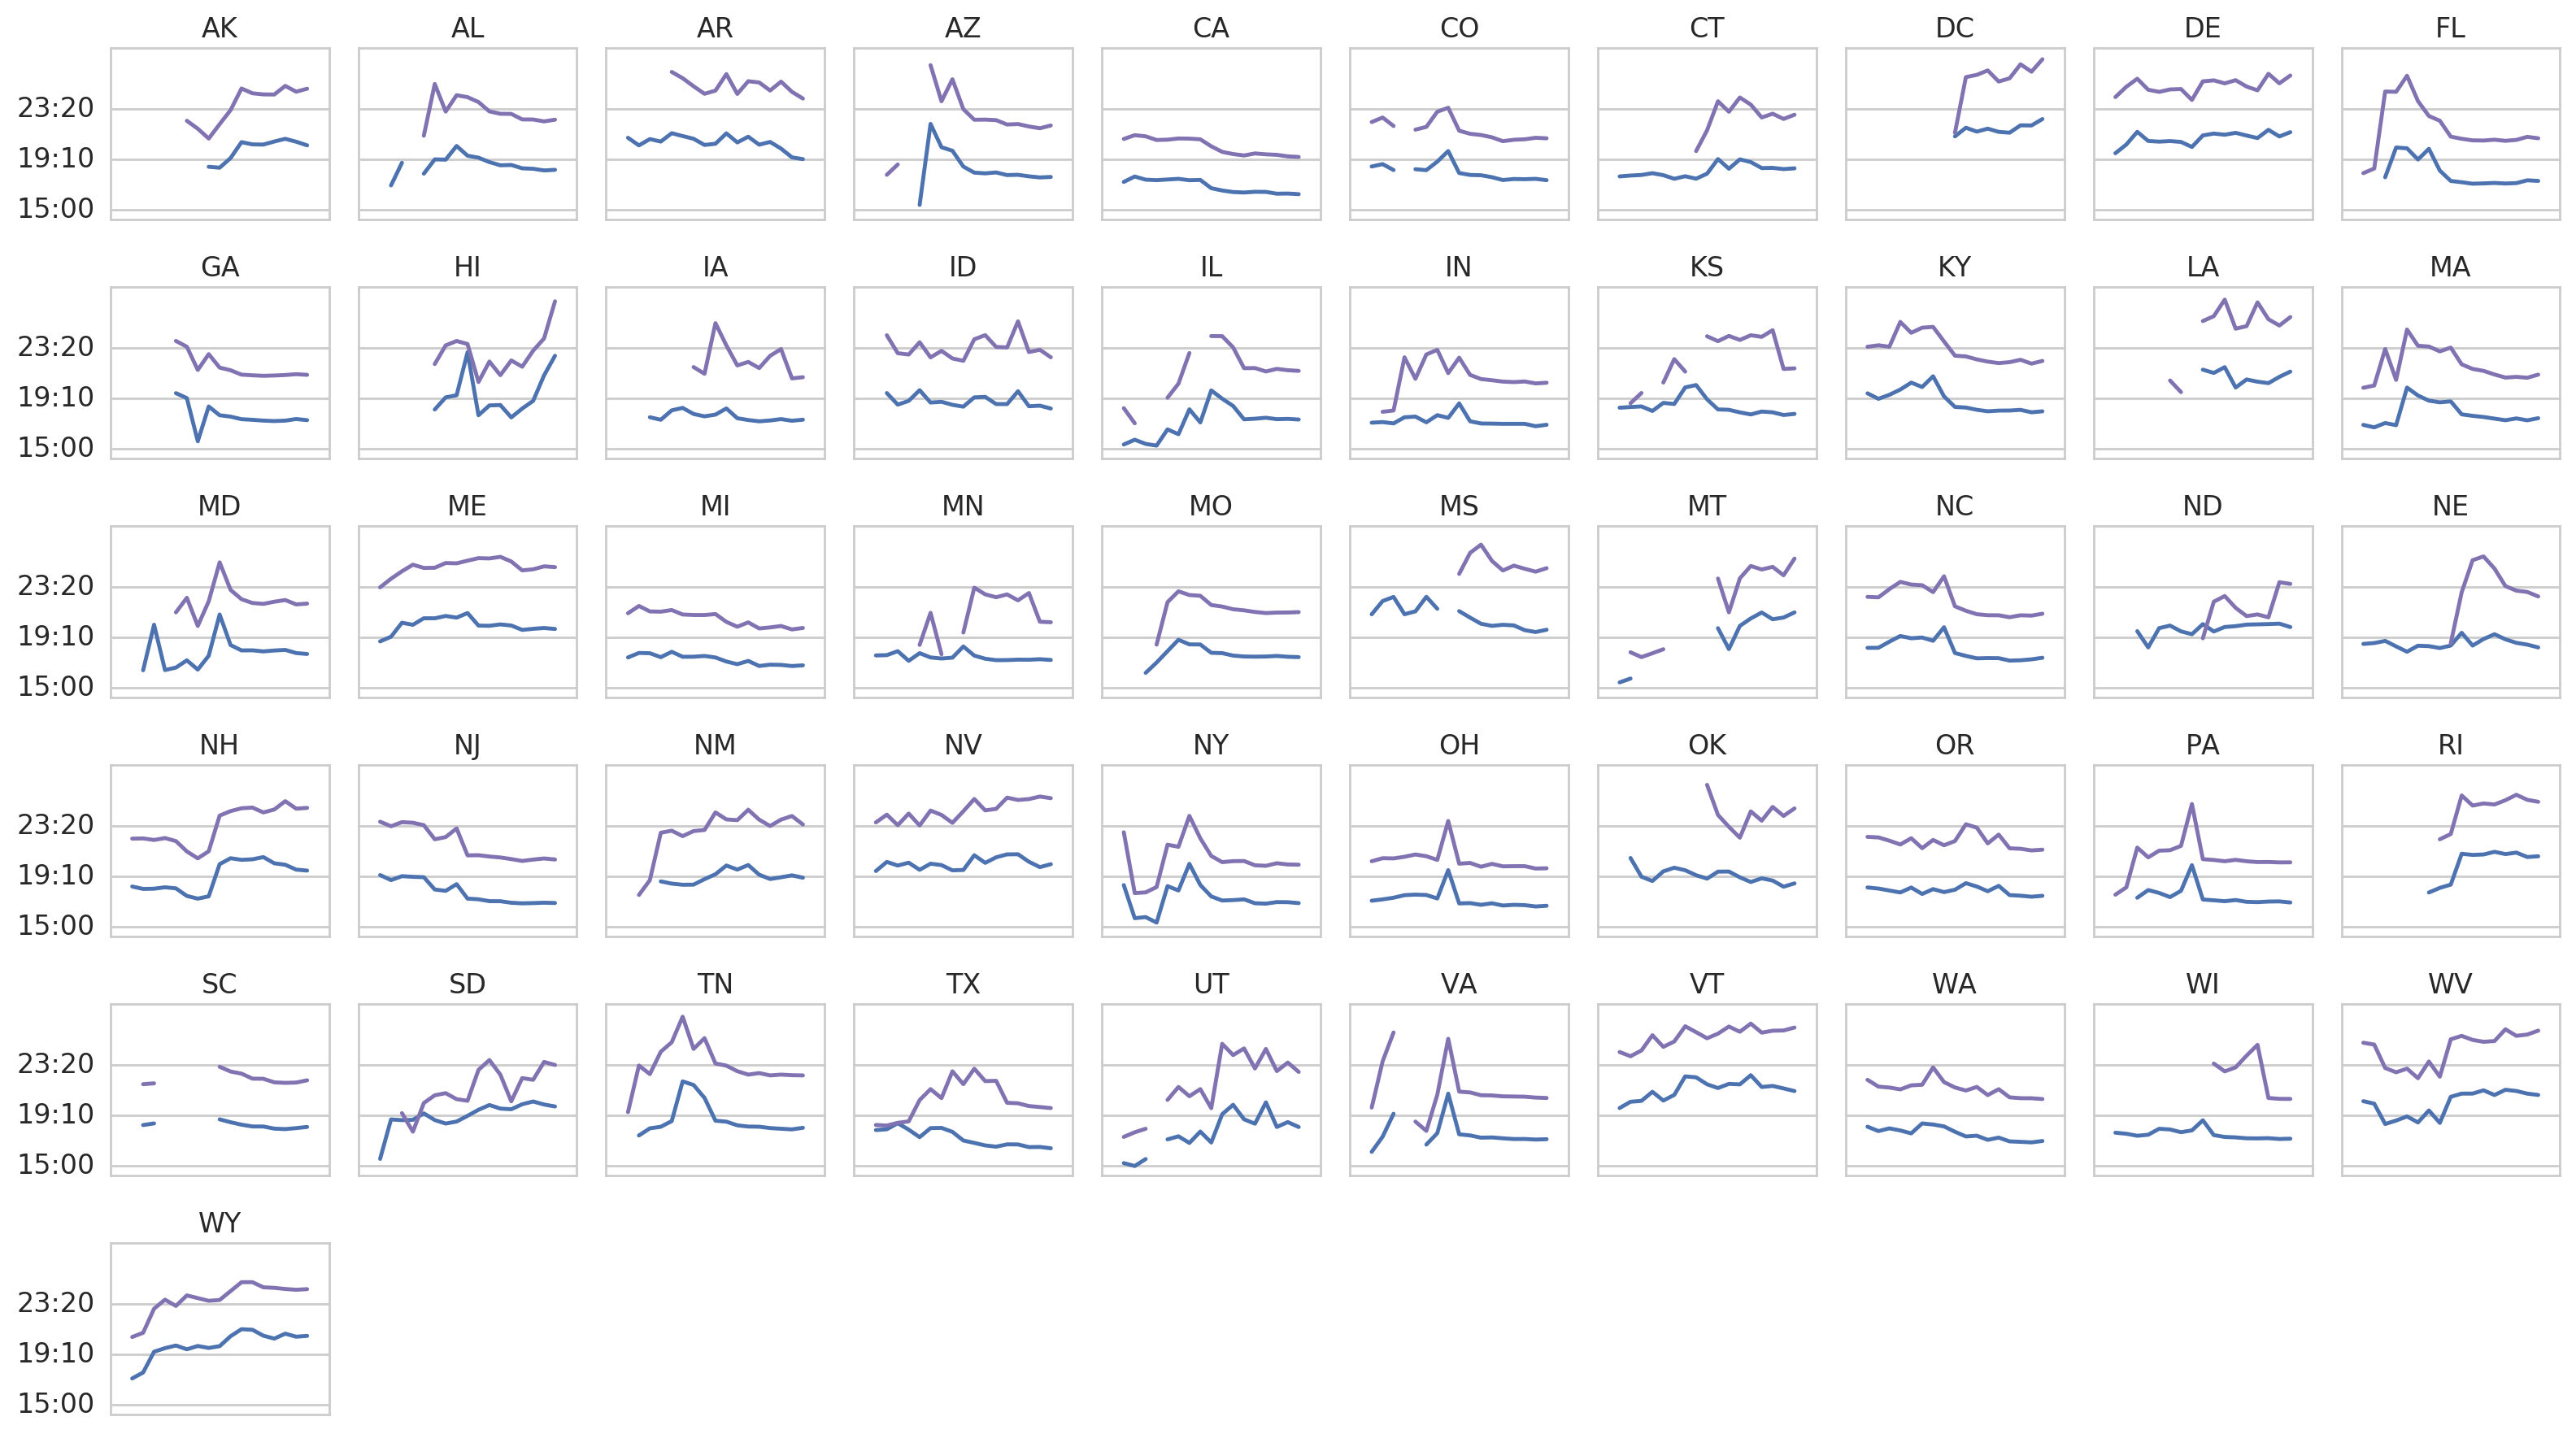

In [99]:
df2 = boys.Time.groupby([df.State, df.Year]).mean()
df3 = girls.Time.groupby([df.State, df.Year]).mean()

years = ['2000','2001','2002','2003','2004','2005','2006','2007',
         '2008','2009','2010','2011','2012','2013','2014','2015','2016']
years = map(int, years)

ind = 0
for key in sorted(df.Time.groupby(df.State).groups.keys()):    
    ind = ind + 1 
    plt.subplot(6, 10, ind)
    plt.xticks([])
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    df2[key].fillna(0).reindex(index = years).plot(title = key, figsize = (16, 9), yticks = [900, 1150, 1400],
                            color = 'b', fontsize = 12, sharey = True, sharex = False)
    df3[key].fillna(0).reindex(index = years).plot(title = key, figsize = (16, 9), yticks = [900, 1150, 1400],
                            color = 'm', fontsize = 12, sharey = True, sharex = False)
    plt.axis([1998, 2018, 850, 1700])
    
    formatter = matplotlib.ticker.FuncFormatter(timeTicks)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(formatter)
    
    plt.tight_layout()
    plt.xlabel('')
plt.show()

In [32]:
import plotly as py

py.offline.init_notebook_mode() # run at the start of every ipython notebook

In [100]:
for col in dfR.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# df['text'] = df['state'] + '<br>' +\
#     '2000 '+df['2000']+' 2001 '+df['2001']+'<br>'+\
#     '2002 '+df['2002']+' 2003 ' + df['2003']+'<br>'+\
#     '2004 '+df['2004']+' 2005 '+df['2005']

data = [dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = dfR['State'],
        z = dfR['Elevation'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                    color = 'rgb(255,255,255)',
                    width = 2)),
            colorbar = dict(
                    title = "Elevation (ft)"))]

layout = dict(
            title = 'US Elevation by State<br>(Hover for detail)',
            geo = dict(
                scope='usa',
                projection=dict(type = 'albers usa'),
                showlakes = False,
                lakecolor = 'rgb(255, 255, 255)'),)

fig = dict(data = data, layout = layout)
py.offline.iplot(fig, filename = 'plotly-elevation')

In [ ]:
year = ['2000','2001','2002','2003','2004','2005','2006','2007',
        '2008','2009','2010','2011','2012','2013','2014','2015','2016']

dfplotly = pd.read_csv('d3usa5kboys.csv')

for yr in year:
  
    # df['text'] = df['state'] + '<br>' +\
    #     '2000 '+df['2000']+' 2001 '+df['2001']+'<br>'+\
    #     '2002 '+df['2002']+' 2003 ' + df['2003']+'<br>'+\
    #     '2004 '+df['2004']+' 2005 '+df['2005']

    data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = dfplotly['code'],
        z = dfplotly[yr].astype(float),
        zmax = 20.3,
        zmin = -23.1,
        zauto = False,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
            colorbar = dict(
            title = "% Difference" 
        ))]

    layout = dict(
        title = 'Percent Difference from national average Boys 5K time by State<br><br>'+yr,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showlakes = False))

    fig = dict(data=data, layout=layout)
    py.offline.iplot(fig, filename='choropleth-map_' + yr, image = 'png', image_height = 1200, image_width = 1600)
#     py.offline.iplot(fig, filename='choropleth-map_' + yr)

<img src="choroplethgif.gif">

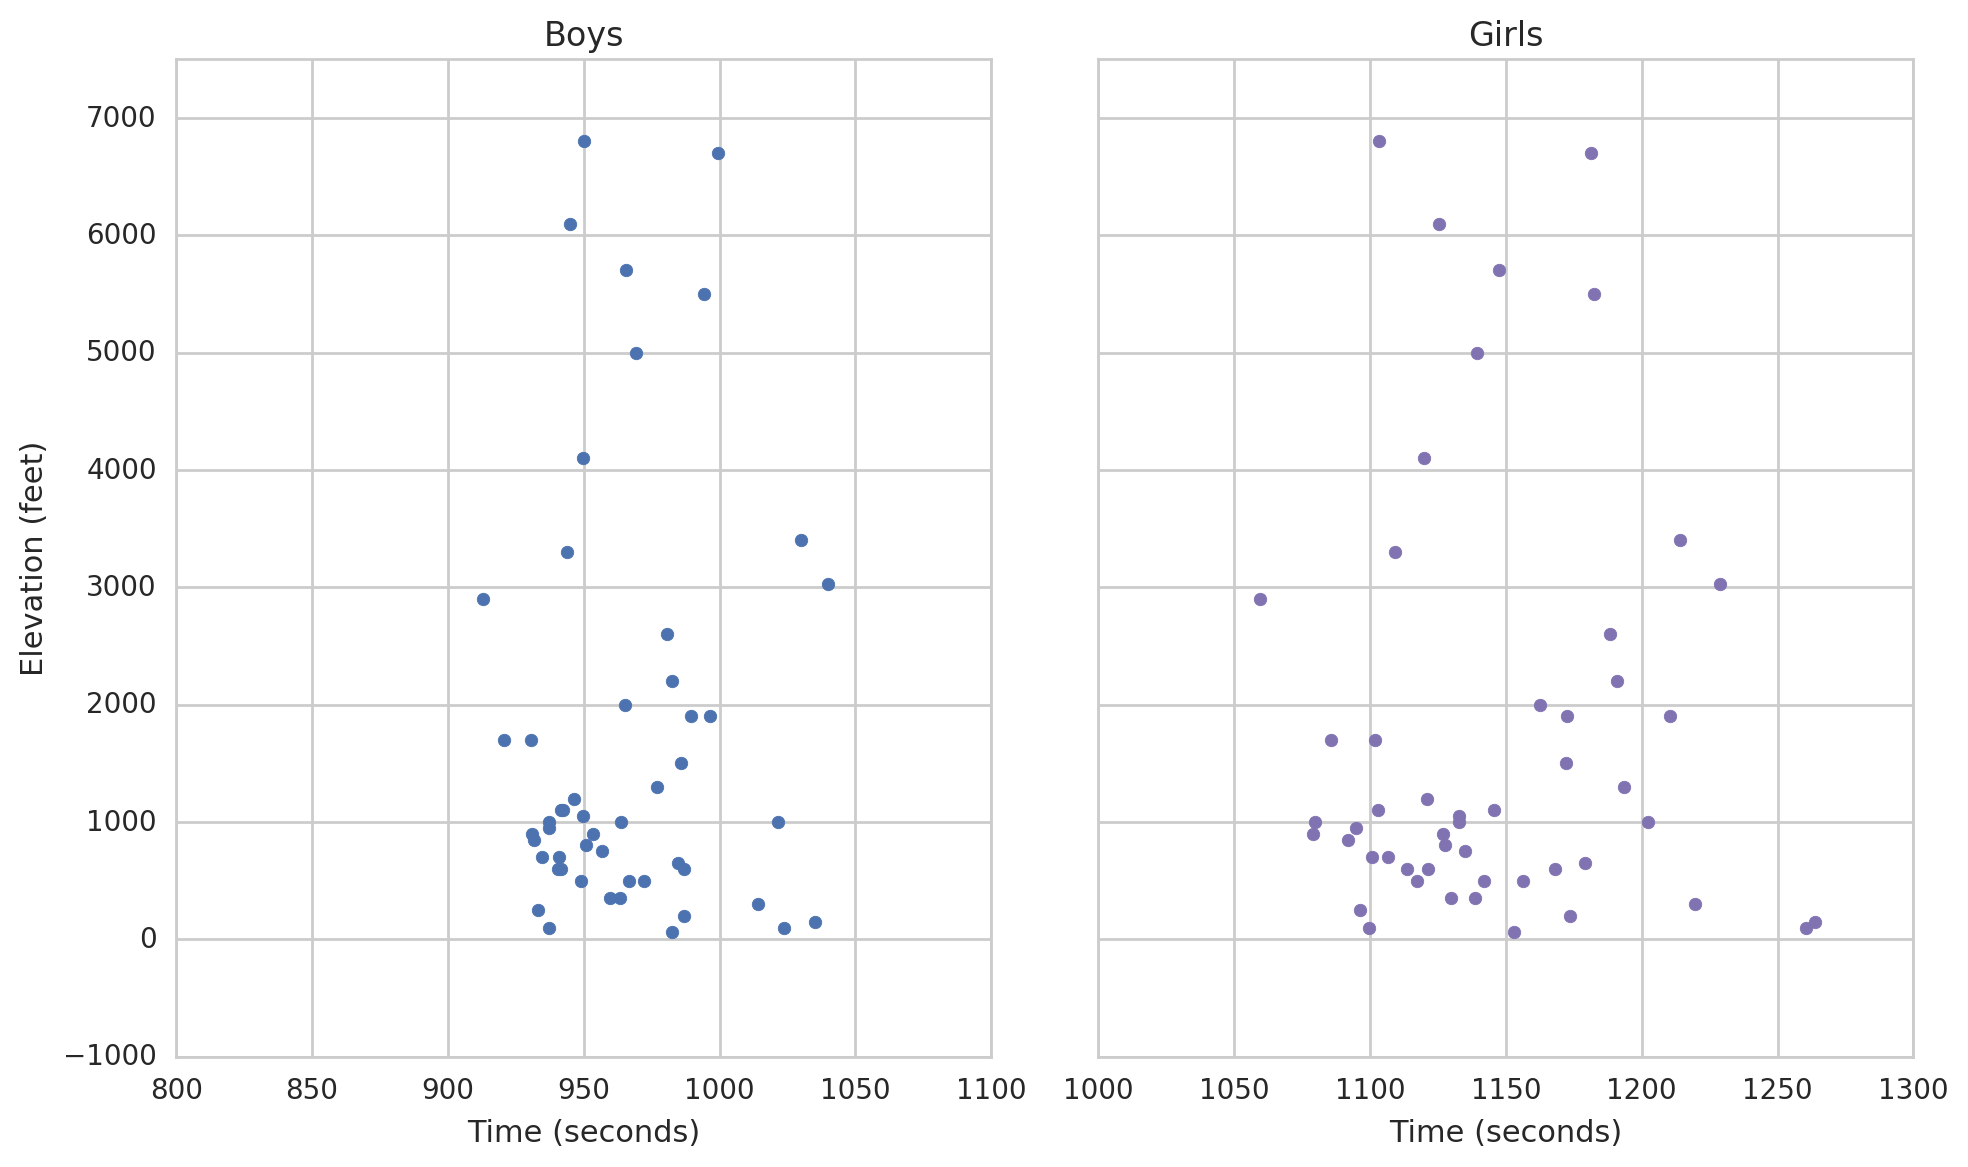

In [101]:
n=20
f, (ax1, ax2)= plt.subplots(1, 2, sharey = True, figsize=(10, 6))

def f(group):
    sorted_times = sorted(group['Time'].values)[100:200]
    return np.mean(sorted_times)

bx = boys.groupby('State').apply(f)
gx = girls.groupby('State').apply(f)

# bx = boys.sort_values(['Time']).head(n).Time
# by = boys.sort_values(['Time']).head(n).Elevation
by = boys.groupby('State').mean().Elevation.head(51)
# bx = boys.sort_values(['State','Time'], ascending = True).groupby('State').head(n).Time
# by = boys.sort_values(['State','Time'], ascending = True).groupby('State').head(n).Elevation
ax1.scatter(bx, by, marker = "o", color = 'b')
ax1.set_title('Boys')
ax1.set_xlim([800, 1100])
ax1.set_ylim([-1000, 7500])
ax1.set_ylabel('Elevation (feet)')
ax1.set_xlabel('Time (seconds)')

# gx = girls.sort_values(['Time']).head(n).Time
# gy = girls.sort_values(['Time']).head(n).Elevation
gy = girls.groupby('State').mean().Elevation.head(51)
# gx = girls.sort_values(['State','Time'], ascending = True).groupby('State').head(n).Time
# gy = girls.sort_values(['State','Time'], ascending = True).groupby('State').head(n).Elevation
ax2.scatter(gx, gy, marker = "o", color = 'm')
ax2.set_title('Girls')
ax2.set_xlim([1000, 1300])
ax2.set_xlabel('Time (seconds)')

# bz = np.polyfit(bx, by, 1)
# bp = np.poly1d(bz)
# ax1.plot(bx, bp(bx), 'b-')
# print "yb=%.6fx+(%.6f)"%(bz[0],bz[1])

# gz = np.polyfit(gx, gy, 1)
# gp = np.poly1d(gz)
# ax2.plot(gx, gp(gx), 'm-')
# print "yg=%.6fx+(%.6f)"%(gz[0],gz[1])

plt.tight_layout()
plt.show()

In [35]:
boys.groupby('State').apply(f)

State
AK     996.493
AL     972.271
AR     984.656
AZ     949.746
CA     912.920
CO     950.230
CT     966.678
DC    1035.090
DE     982.487
FL     937.115
GA     941.712
HI    1039.818
IA     941.484
ID     969.206
IL     940.567
IN     934.562
KS     965.313
KY     956.658
LA    1023.681
MA     948.990
MD     959.517
ME     986.935
MI     931.025
MN     946.274
MO     950.867
MS    1014.211
MT    1029.852
NC     940.829
ND     989.652
NE     980.673
NH     963.749
NJ     933.314
NM     965.379
NV     994.154
NY     937.104
OH     931.795
OK     976.997
OR     943.787
PA     942.527
RI     986.821
SC     963.483
SD     982.361
TN     953.436
TX     920.838
UT     945.053
VA     937.219
VT    1021.505
WA     930.583
WI     949.648
WV     985.975
WY     999.295
dtype: float64

In [ ]:
# boys.groupby('State').mean().Elevation.head(51).to_csv('elevation.csv', encoding='utf-8')

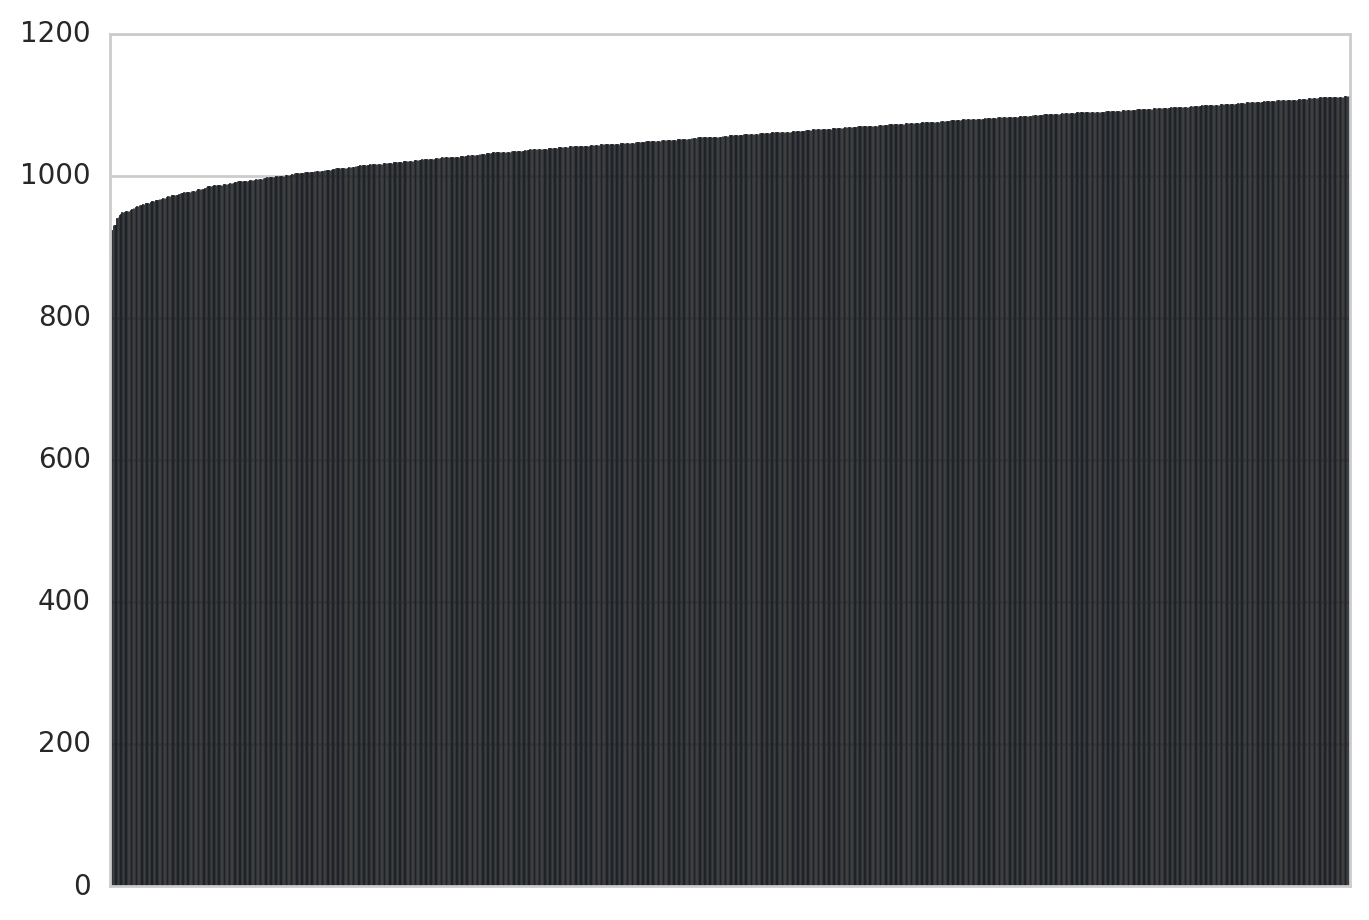

In [102]:
# y = boys.groupby('State').get_group('CO').Time
# x = boys.groupby('State').get_group('CO').Index()
boys.groupby(['State', 'Year']).get_group(('CO', 2013)).Time.plot.bar()
plt.xticks([])
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.show()

# To Do
centaurus data
xkcd plot: appreciation of wifes patience v. time spent on side project


In [67]:
dfCXC = pd.read_csv('centaurus.csv', names = ['Year', 'Time'])
dfCXC['Time'] = dfCXC['Time'].astype('str')
dfCXC['Time'] = dfCXC['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1][0:2]))   # convert xx:xx to number of seconds
# dfCXC.dtypes

Year    int64
Time    int64
dtype: object

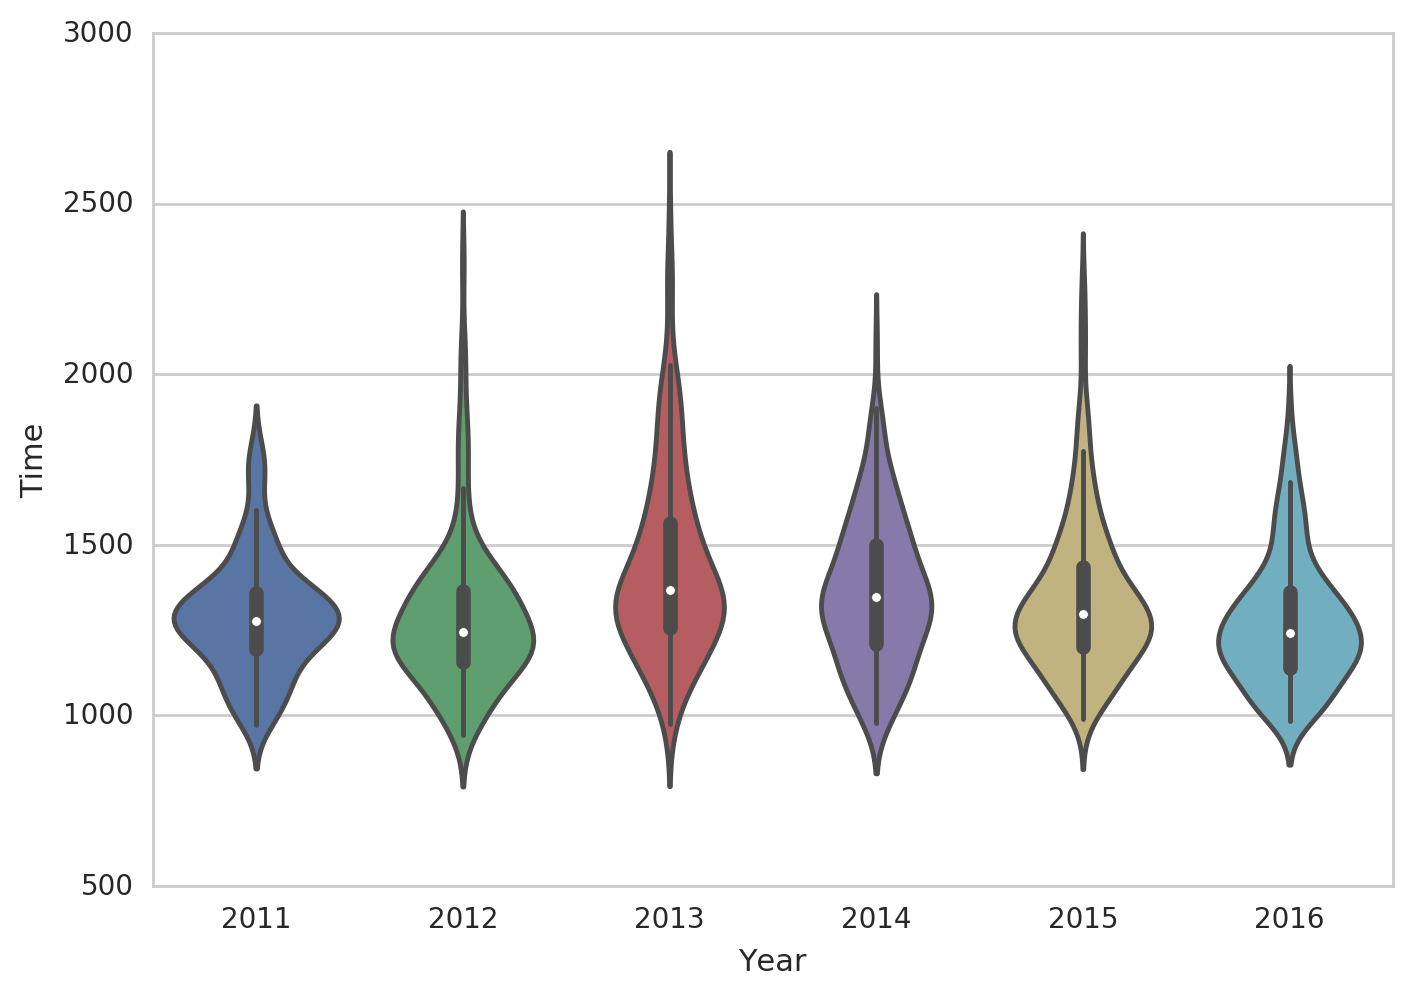

In [89]:
sns.violinplot(x=dfCXC.Year, y=dfCXC.Time)

# # plt.scatter(dfCXC.Year, dfCXC.Time, s = 1, marker = ".", color = 'b')

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))


# ax.violinplot(dfCXC.Year, dfCXC.Time, points=20, widths=0.3,
#                       showmeans=True, showextrema=True, showmedians=True)

# ax = plt.gca()

# ax.set_title('Centaurus XC')
# ax.set_xlim([2010, 2017])
# ax.set_ylim([700, 2800])
# ax.set_ylabel('Time')

# def timeTicks(x, pos):
#     d = datetime.timedelta(seconds = x)
#     return str(d)[2:7]                                                                             
# formatter = matplotlib.ticker.FuncFormatter(timeTicks)
# ax.yaxis.set_major_formatter(formatter)
# ax.get_xaxis().get_major_formatter().set_useOffset(False)

# plt.tight_layout()
plt.show()